## Time evolving foliar CN vs CO2, global runs to 2100

#### Load packages

In [1]:
#Load necessary packages for data visualization 
import xarray as xr
from ctsm_py import utils
#import utils
import numpy as np
import pandas as pd
from netCDF4 import num2date
import dask 
from scipy import stats

#some resources for plotting
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os,sys
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

%matplotlib inline
import pandas as pd
import datetime as dt
from datetime import datetime

import seaborn as sns
import math as mt
import matplotlib.colors as colors

#### Read in data

In [2]:

### Data for future simulations
# User defined options
model = 'CLM5_GSWP3'
## Read in slope 0 and slope 20 cases
archive = '/glade/scratch/wwieder/archive/'
caseShort = ['cnSlope0', 'cnSlope20', 'cnMulti']
cases = ['ctsm51d074_2deg_GSWP3V1_ssp370_'+short for short in caseShort]
path = '/lnd/hist/'
fin = [archive + case + path + "concat/" + case + '_cat_short.nc' for case in cases]
#print(fin[0])

# Read in files for .area and .landfrac
fin2 = [archive + case + path + case + '.clm2.h0.2015-01.nc' for case in cases]
#print(fin2[0])

### Read in historical data
cases2 = ['ctsm51d074_2deg_GSWP3V1_hist_'+short for short in caseShort]
finHist = [archive + case + path + "concat/" + case + '_cat_short.nc' for case in cases2]

# Read in files for .area and .landfrac
finHist2 = [archive + case + path + case + '.clm2.h0.1850-01.nc' for case in cases2]
print(finHist2[0])

/glade/scratch/wwieder/archive/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0/lnd/hist/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0.clm2.h0.1850-01.nc


In [3]:
# Read in data, time and time_bounds just used for utils.time_set_mid
var = ['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX','FPI','RAIN', 'SNOW',
       'time', 'time_bounds']

'''select the variables we want to read in'''
def preprocess(ds, var=var):
    return ds[var]

# For slope 0
for i in range(len(cases)):
    dsIN = utils.time_set_mid(xr.open_mfdataset(fin[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs = utils.time_set_mid(xr.open_mfdataset(fin2[i], decode_times=True), 'time')
    dsIN['area'] = LandDs.area
    dsIN['landfrac'] = LandDs.landfrac

    if i == 0:
        ds = dsIN
    else:
        ds = xr.concat([ds,dsIN],"case",data_vars='all')


ds = ds.assign_coords(case=("case", caseShort))
ds = ds[['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'FPI','TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX','RAIN', 'SNOW']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds

<xarray.Dataset>
Dimensions:             (case: 3, time: 1032, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/19)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Aug 22 16:02:29 2022: ncrcat -v...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [4]:
## Read in historical data

'''select the variables we want to read in'''
def preprocess(ds2, var=var):
    return ds2[var]

# For slope 0
for i in range(len(cases)):
    dsIN2 = utils.time_set_mid(xr.open_mfdataset(finHist[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs2 = utils.time_set_mid(xr.open_mfdataset(finHist2[i], decode_times=True), 'time')
    dsIN2['area'] = LandDs2.area
    dsIN2['landfrac'] = LandDs2.landfrac

    if i == 0:
        ds2 = dsIN2
    else:
        ds2 = xr.concat([ds2,dsIN2],"case",data_vars='all')


ds2 = ds2.assign_coords(case=("case", caseShort))
ds2 = ds2[['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'FPI','TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX', 'RAIN', 'SNOW']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds2

<xarray.Dataset>
Dimensions:             (case: 3, time: 1980, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-01-16 11:44:59.999993 ... 2014-12-...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/19)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Aug 22 16:16:56 2022: ncrcat -v...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [11]:
%%time 
#from dask.distributed import wait
dsFull = xr.concat([ds2,ds],"time",data_vars='all')
#dsFull.load()  # this may make things really slow now, but hopefully faster later on
#_ = wait(dsFull)
dsFull
# I'm not sure this makes the subsequent calculation of dsAnn any faster or not?


CPU times: user 15.7 ms, sys: 73 µs, total: 15.8 ms
Wall time: 14.6 ms


<xarray.Dataset>
Dimensions:             (case: 3, time: 3012, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-01-16 11:44:59.999993 ... 2100-12-...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/19)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Aug 22 16:16:56 2022: ncrcat -v...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...


### Convert monthly to annual

<xarray.Dataset>
Dimensions:             (time: 251, lon: 144, lat: 96, case: 3)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/19)
    NPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>

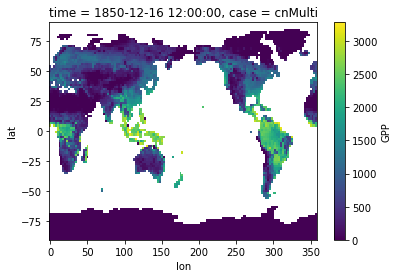

In [12]:
spy = 365 * 24 * 3600               # Convert  to annual fluxes (gC/m2/y), from gc/m2/s 
dsAnn = dsFull.apply(utils.weighted_annual_mean)
fluxes = ['GPP', 'NPP', 'NFIX', 'NET_NMIN', 'ER', 'HR', 'QVEGT', 'QVEGE','QSOIL','NBP', 'RAIN','SNOW', 'QRUNOFF_TO_COUPLER']
for i in range(len(fluxes)):
    dsAnn[fluxes[i]] = dsAnn[fluxes[i]] * spy

dsAnn.GPP.isel(time=0, case=2).plot() ;
dsAnn

In [13]:
##Load to memory
# this seems to take forever...
dsAnn = dsAnn.load()
print('loaded data to memory')

loaded data to memory


In [14]:
## Mask out really small values
minGPP2 = 10
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP2)


In [15]:
dsFull = dsFull.where(dsFull.GPP.min('time') > minGPP2)

### Calculate Litter CN

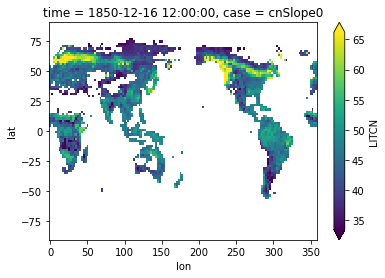

In [16]:
dsAnn['LITCN'] = dsAnn.TOTLITC / dsAnn.TOTLITN
#dsAnn.TOTMICN.values
dsAnn.LITCN.isel(time=0, case=0).plot(robust=True)
dsAnn.LITCN.mean(['lat', 'lon']).isel(time=10).values
dsAnn['LITCN'].attrs['units'] = 'gC/gN'


### Calculate ET

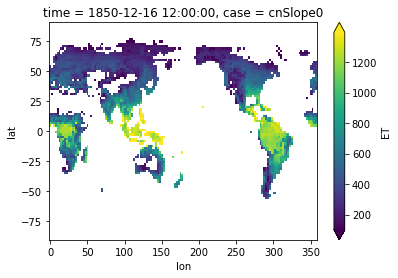

In [17]:
dsAnn['ET'] = dsAnn.QVEGT + dsAnn.QVEGE + dsAnn.QSOIL
dsAnn.ET.isel(time=0, case=0).plot(robust=True)
dsAnn.ET.mean(['lat', 'lon']).isel(time=10).values
dsAnn['ET'].attrs['units'] = 'mm y^-1'
minET = 10
dsAnn = dsAnn.where(dsAnn.ET.min('time') > minET)

### Calculate WUE

array([1.87697594, 1.87570104, 1.87647888])

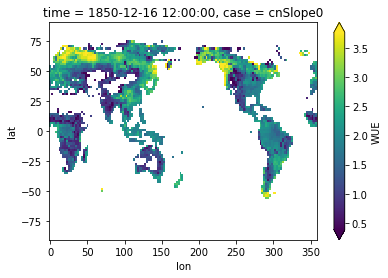

In [18]:
dsAnn['WUE'] = dsAnn.GPP / dsAnn.ET
dsAnn.WUE.isel(time=0, case=0).plot(robust=True)
dsAnn.WUE.mean(['lat', 'lon']).isel(time=0).values

### Calculate water yield

array([0.33386422, 0.33388615, 0.33356846])

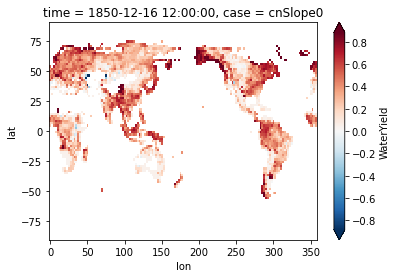

In [19]:
dsAnn['WaterYield'] = dsAnn.QRUNOFF_TO_COUPLER / (dsAnn.RAIN + dsAnn.SNOW)
dsAnn.WaterYield.isel(time=0, case=0).plot(robust=True)
dsAnn.WaterYield.mean(['lat', 'lon']).isel(time=0).values

### Calculate NMinn/NPP

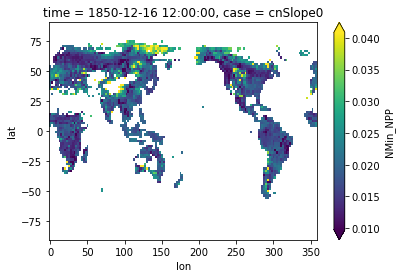

In [20]:
dsAnn['NMin_NPP'] = dsAnn.NET_NMIN/dsAnn.NPP
dsAnn.NMin_NPP.isel(time=0, case=0).plot(robust=True)
#dsAnn.WaterYield.mean(['lat', 'lon']).isel(time=0).values

### Check the time series

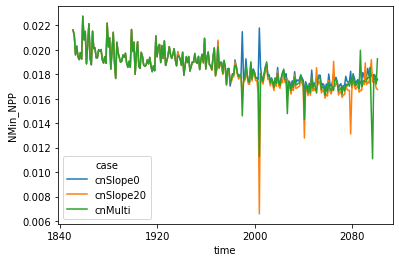

In [21]:
dsAnn.NMin_NPP.mean(['lat', 'lon']).plot(hue='case') ;
# Mask out absurd values if needed
# dsAnn['CUE'] = dsAnn.CUE.where(dsAnn.CUE > -1).where(dsAnn.CUE < 1)

In [22]:
## Add units and metadata back into dsAnn
AllVars = ['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','FPI','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX']
CVars = ['NPP', 'GPP','NBP','ER', 'HR']
NVars = ['NFIX', 'NET_NMIN']
WaterVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WaterYield']
WUE = ['WUE']
for i in range(len(AllVars)):
    dsAnn.attrs[AllVars[i]] = dsFull.get(AllVars[i]).attrs
for i in range(len(CVars)): 
    dsAnn[CVars[i]].attrs['units'] = 'gC/m2/yr'
for i in range(len(NVars)): 
    dsAnn[NVars[i]].attrs['units'] = 'gN/m2/yr'
for i in range(len(WaterVars)): 
    dsAnn[WaterVars[i]].attrs['units'] = 'mm/yr'
for i in range(len(WUE)): 
    dsAnn[WUE[i]].attrs['units'] = 'gC/mm'
dsAnn

<xarray.Dataset>
Dimensions:             (case: 3, time: 251, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/24)
    NPP                 (case, time, lat, lon) float64 nan nan nan ... nan nan
    GPP                 (case, time, lat, lon) float64 nan nan nan ... nan nan
    LEAFCN              (case, time, lat, lon) float64 nan nan nan ... nan nan
    QVEGT               (case, time, lat, lon) float64 nan nan nan ... nan nan
    QVEGE               (case, time, lat, lon) float64 nan nan nan ... nan nan
    QSOIL               (case, time, lat, lon) float64 nan nan nan ... nan nan
    ...                  ...
    SNOW                (case, time, lat, lon) float64 nan nan nan ... nan nan
    LITCN               (case, time, lat, lon) float64 nan nan nan ... nan nan
    ET                  (case, time, lat, lon) float64 nan nan nan ... nan nan
    WUE                 (case, time, lat, lon) float64 nan nan nan ... nan nan
    WaterYield          (case, time, lat, lon) float64 nan nan nan ... nan nan
    NMin_NPP            (case, time, lat, lon) float64 nan nan nan ... nan nan
Attributes: (12/17)
    NPP:                 {'long_name': 'net primary production', 'units': 'gC...
    GPP:                 {'long_name': 'gross primary production', 'units': '...
    LEAFCN:              {'long_name': 'Leaf CN ratio used for flexible CN', ...
    QVEGT:               {'long_name': 'canopy transpiration', 'units': 'mm/s...
    QVEGE:               {'long_name': 'canopy evaporation', 'units': 'mm/s',...
    QSOIL:               {'long_name': 'Ground evaporation (soil/snow evapora...
    ...                  ...
    QRUNOFF_TO_COUPLER:  {'long_name': 'total liquid runoff sent to coupler (...
    ER:                  {'long_name': 'total ecosystem respiration, autotrop...
    HR:                  {'long_name': 'total heterotrophic respiration', 'un...
    NBP:                 {'long_name': 'net biome production, includes fire, ...
    NET_NMIN:            {'long_name': 'net rate of N mineralization', 'units...
    NFIX:                {'long_name': 'Symbiotic BNF uptake flux', 'units': ...

### Make weights for the global sum

sum area_wgt = 0.9999999


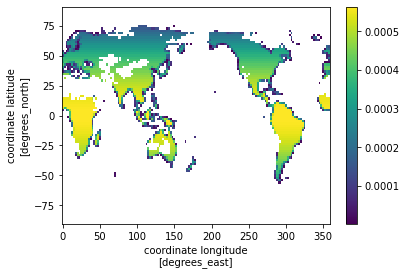

In [23]:
# only weight areas for grids with GPP>0
minGPP = 10.
landUp = LandDs.area * LandDs.landfrac * 1e6      # area in km2, not m2
landUp = landUp.where(dsAnn.GPP.isel(case=0).min('time') > minGPP)
landUp.attrs['units'] = 'm^2'

# weighting for each grid cell
area_wgt = (landUp / landUp.sum()).drop('case')
area_wgt.plot()
print('sum area_wgt = '+ str(area_wgt.sum().values) )

In [24]:
landUp

<xarray.DataArray (lat: 96, lon: 144)>
dask.array<where, shape=(96, 144), dtype=float32, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
    case     <U9 'cnSlope0'
Attributes:
    units:    m^2

### Calculate the global sums

In [25]:
# ?? This could also be done regionally (see Paul's comments on google doc) ??
ann_glob = (dsAnn * landUp).sum(dim=('lat', 'lon'))

## 1 mm water = 1 kg/m2,  1e-15 for kg to Tt,  1e-15 gC to PgC,
# convert to Pg C/y, mm to Tt
Cvars = ['TOTVEGC','GPP','NPP', 'NBP', 'HR', 'ER']
Nvars = ['NFIX', 'NET_NMIN']
Water = ['ET', 'QRUNOFF_TO_COUPLER', 'WaterYield']
CNvars = ['LITCN','LEAFCN', 'FPI', 'NMin_NPP']
for i in range(len(Cvars)):
    ann_glob[Cvars[i]] = ann_glob[Cvars[i]] * 1e-15
    if Cvars[i] == 'TOTVEGC':
        
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C'
    else: 
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C y^-1'
         
for i in range(len(Nvars)):
    ann_glob[Nvars[i]] = ann_glob[Nvars[i]] * 1e-12
    ann_glob[Nvars[i]].attrs['units'] = 'Tg N y^-1'

# for i in range(len(Water)):
#     ann_glob[Water[i]] = ann_glob[Water[i]] * 1e-12
#     ann_glob[Water[i]].attrs['units'] = 'Tg y^-1'
        
##Add metadata
for i in range(len(Cvars)):
    ann_glob.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
for i in range(len(Nvars)):
    ann_glob.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs


# area weighted mean
ann_Awgt = (dsAnn * area_wgt).sum(dim=('lat', 'lon'))

##Add metadata
for i in range(len(Cvars)):
    ann_Awgt.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
    ann_Awgt[Cvars[i]].attrs['units'] = 'Pg C y^-1'
for i in range(len(Nvars)):
    ann_Awgt.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs
    ann_Awgt[Nvars[i]].attrs['units'] = 'TgN y^-1'
for i in range(len(CNvars)):
    ann_Awgt.attrs[CNvars[i]] = dsAnn.get(CNvars[i]).attrs
for i in range(len(Water)):
    ann_Awgt.attrs[Water[i]] = dsAnn.get(Water[i]).attrs
    ann_Awgt[Water[i]].attrs['units'] = 'mm y^-1'
ann_Awgt['WUE'].attrs['units'] = 'gC/mm'

In [26]:
ann_glob['Nmin_Npp']=ann_glob.NET_NMIN/ann_glob.NPP
ann_Awgt['Nmin_Npp']=ann_Awgt.NET_NMIN/ann_Awgt.NPP

### Varible lists and subset 2 cases to use

In [27]:
#quick plot , the `;` on the last line supresses text after executing the cell
vars = ['GPP', 'NPP', 'TOTVEGC', 'CUE', 'EFLX_LH_TOT', 'LEAFCN']
globVars = ['GPP', 'NPP', 'NBP', 'TOTVEGC', 'NFIX', 'NET_NMIN']
vars2 = ['EFLX_LH_TOT', 'LEAFCN', 'LITCN']

ann_glob_sub = ann_glob.isel(case = [0,1])
ann_glob_sub.attrs = ann_glob.attrs
ann_Awgt_sub = ann_Awgt.isel(case = [0,1])
ann_Awgt_sub.attrs = ann_Awgt.attrs
ann_Awgt_sub

<xarray.Dataset>
Dimensions:             (time: 251, case: 2)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * case                (case) <U9 'cnSlope0' 'cnSlope20'
Data variables: (12/25)
    NPP                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    GPP                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    LEAFCN              (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QVEGT               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QVEGE               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QSOIL               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    ...                  ...
    LITCN               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    ET                  (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    WUE                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    WaterYield          (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    NMin_NPP            (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    Nmin_Npp            (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
Attributes: (12/15)
    TOTVEGC:             {'units': 'Pg C'}
    GPP:                 {'units': 'Pg C y^-1'}
    NPP:                 {'units': 'Pg C y^-1'}
    NBP:                 {'units': 'Pg C y^-1'}
    HR:                  {'units': 'Pg C y^-1'}
    ER:                  {'units': 'Pg C y^-1'}
    ...                  ...
    LEAFCN:              {}
    FPI:                 {}
    NMin_NPP:            {}
    ET:                  {'units': 'mm/yr'}
    QRUNOFF_TO_COUPLER:  {'units': 'mm/yr'}
    WaterYield:          {'units': 'mm/yr'}

In [28]:
# Generate a function for making plots of maps
from cartopy.util import add_cyclic_point
def map_function(da, cb=0, panel=None, cmap=None, ax=None, 
                 title=None, vmax=None, vmin=None):
    '''a function to make one subplot'''
    wrap_data, wrap_lon = add_cyclic_point(da.values, coord=da.lon)

    if ax is None: ax = plt.gca()
    im = ax.pcolormesh(wrap_lon,da.lat,wrap_data,
                   transform=ccrs.PlateCarree(),
                   vmax=vmax,vmin=vmin,cmap=cmap)
    ax.set_title(title)
    ax.coastlines()
    ax.set_extent([-180,180,-65,80], crs=ccrs.PlateCarree())
    ax.annotate(panel, xy=(0.05, 0.95), xycoords=ax.transAxes,
                ha='center', va='center',fontsize=16)    

    # allows for different colorbars on each plot
    if cb == 1:
        fig.colorbar(im, ax=ax,shrink=0.30, pad=0, fraction = 0.1)
        
#p.axes.gridlines(color='black', alpha=0.5, linestyle='--');
## Do I need to do add cycling point? How important is that (from Will's map function)? 



NameError: name 'z' is not defined

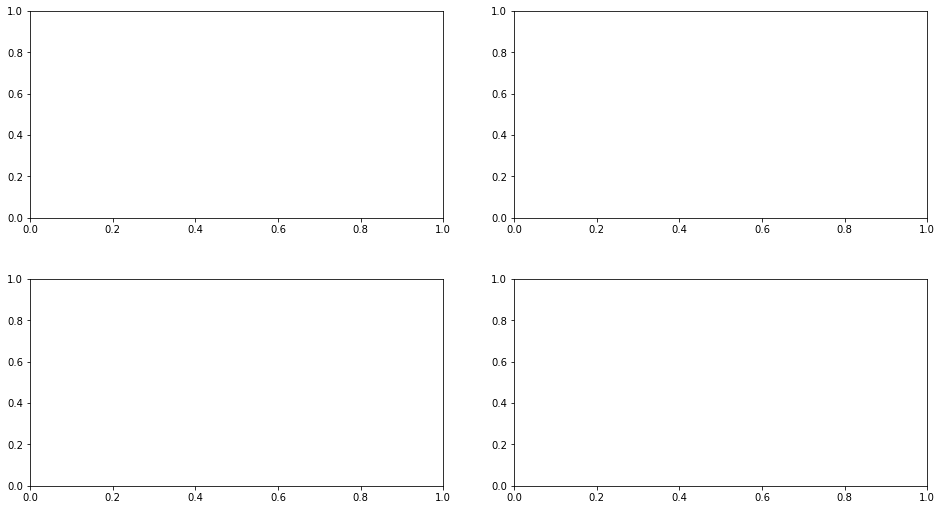

In [19]:
##Test the function
fig, axs = plt.subplots(2, 2,  figsize=(14,8))
fig.tight_layout(pad=4)
map_function(z, a=1, b=2)



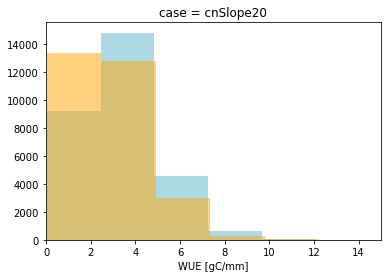

In [31]:
dsAnn_0 = dsAnn.isel(case=0, time = slice (-10,None))
dsAnn_20 = dsAnn.isel(case=1, time = slice (-10,None))
from collections import Counter
#count = Counter(dsAnn_0['WUE'].values)
#dsAnn_0.WUE[:,0]
#dsAnn_0['WUE'].plot()
dsAnn_0['WUE'].plot(color = 'lightblue', label = "FIXED", xlim = (0,15), bins = 10)
dsAnn_20['WUE'].plot(color = 'orange', label = "FLEX", alpha = 0.5);
#plt.hist(dsAnn_0['WUE'].values)



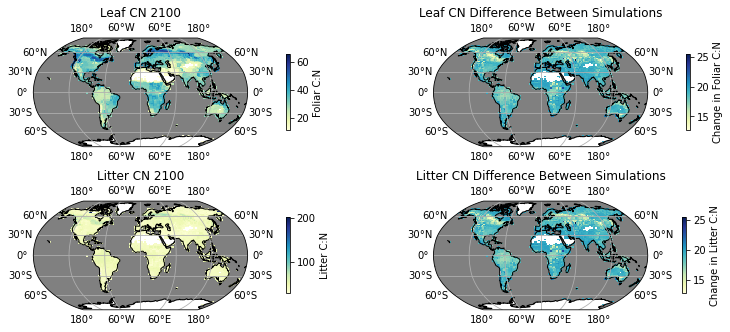

In [17]:
# Use subplot_kw to declare the projection
from matplotlib import gridspec
LEAFCN1 = ann_Awgt.isel(case = 1)
LEAFCN1.attrs['LEAFCN'] = ann_glob.get('LEAFCN').attrs
LEAFCN0 = ann_Awgt.isel(case = 0)
LEAFCN0.attrs['LEAFCN'] = ann_glob.get('LEAFCN').attrs



fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(14,5), subplot_kw={"projection": ccrs.Robinson()}, gridspec_kw = {'wspace':0.05, 'hspace':0.5})

# fig = plt.figure()
 
# # to change size of subplot's
# # set height of each subplot as 8
# fig.set_figheight(8)
 
# # set width of each subplot as 8
# fig.set_figwidth(8)
 
# # create grid for different subplots
# spec = gridspec.GridSpec(ncols=3, nrows=1,
#                          width_ratios=[1.5, 1, 1], wspace=0.5,
#                          hspace=0.5, height_ratios=[1])

z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['LEAFCN']# Climatology for last 10 years of data
z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')['LEAFCN']
zdiff = z20 - z
zdiff = utils.cyclic_dataarray(zdiff)

z2 = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['LITCN']# Climatology for last 10 years of data
z202 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')['LITCN']
zdiff2 = z202 - z2
zdiff2 = utils.cyclic_dataarray(zdiff)

wrap_data1, wrap_lon1 = add_cyclic_point(z.values, coord=z.lon)
wrap_data2, wrap_lon2 = add_cyclic_point(zdiff.values, coord=zdiff.lon)

wrap_data3, wrap_lon3 = add_cyclic_point(z2.values, coord=z2.lon)
wrap_data4, wrap_lon4 = add_cyclic_point(zdiff2.values, coord=zdiff2.lon)


# #ax0 = fig.add_subplot(spec[0])
# ax0.plot(ann_Awgt_sub.coords['time.year'], LEAFCN0.get('LEAFCN'), label = "control");
# ax0.plot(ann_Awgt_sub.coords['time.year'], LEAFCN1.get('LEAFCN'), label = "slope20");
# ax0.set_xlabel('Year')
# ax0.set_ylabel('Foliar C:N')
# ax0.legend(loc='upper left');

#ax1 = fig.add_subplot(spec[1])
ax1.set_title('Leaf CN 2100')
ax1.set_aspect('equal', adjustable=None)
im = ax1.pcolormesh(wrap_lon1, z.lat, wrap_data1, transform=ccrs.PlateCarree(),cmap='YlGnBu')
ax1.set_global()
ax1.add_feature(cfeature.OCEAN, facecolor='grey')
ax1.coastlines()
ax1.gridlines(draw_labels=True)
fig.colorbar(im, ax=ax1,shrink=.7, pad=0.1, fraction = 0.09, label = 'Foliar C:N')

#ax1 = fig.add_subplot(spec[2])
ax2.set_title('Leaf CN Difference Between Simulations')
im2 = ax2.pcolormesh(wrap_lon2, zdiff.lat, wrap_data2, transform=ccrs.PlateCarree(),cmap='YlGnBu')
ax2.set_global()
ax2.add_feature(cfeature.OCEAN, facecolor='grey')
ax2.coastlines()
ax2.gridlines(draw_labels=True)
fig.colorbar(im2, ax=ax2,shrink=.7, pad=0.1, fraction = 0.09, label = 'Change in Foliar C:N')


ax3.set_title('Litter CN 2100')
im3 = ax3.pcolormesh(wrap_lon3, zdiff2.lat, wrap_data3, transform=ccrs.PlateCarree(),cmap='YlGnBu')
ax3.set_global()
ax3.add_feature(cfeature.OCEAN, facecolor='grey')
ax3.coastlines()
ax3.gridlines(draw_labels=True)
fig.colorbar(im3, ax=ax3,shrink=.7, pad=0.1, fraction = 0.09, label = 'Litter C:N')

ax4.set_title('Litter CN Difference Between Simulations')
im4 = ax4.pcolormesh(wrap_lon4, zdiff2.lat, wrap_data4, transform=ccrs.PlateCarree(),cmap='YlGnBu')
ax4.set_global()
ax4.add_feature(cfeature.OCEAN, facecolor='grey')
ax4.coastlines()
ax4.gridlines(draw_labels=True)
fig.colorbar(im4, ax=ax4,shrink=.7, pad=0.09, fraction = 0.1, label = 'Change in Litter C:N')





plt.show()

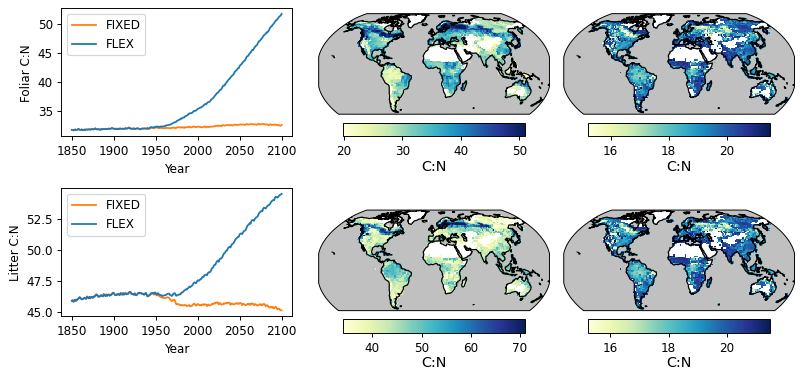

In [95]:
proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['LEAFCN']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['LEAFCN']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(11, 5), dpi=86)
spec = fig.add_gridspec(20, 60)

ax2 = fig.add_subplot(spec[0:7, 21:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Foliar C:N 2100')
im = z.plot(x='lon', y='lat',
                  #vmin=0, vmax=2000,
                  cmap='YlGnBu',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax = fig.add_subplot(spec[7:8,23:38])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("C:N", y=-3, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')

ax3 = fig.add_subplot(spec[0:7, 41:60], projection=proj)
ax3.add_feature(cfeature.OCEAN, facecolor='silver')
ax3.coastlines()
ax3.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax3.set_title('Difference between Fixed and Flex in 2100')
im = zdiff.plot(x='lon', y='lat',
                  #vmin=-400, vmax=400,
                  cmap='YlGnBu',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax2 = fig.add_subplot(spec[7:8,43:58])
cb2 = fig.colorbar(im, cax=cax2, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax2.set_title("C:N", y=-3, fontsize = 12)
cax2.xaxis.set_ticks_position('bottom')


ax1 = fig.add_subplot(spec[0:8, :19])
LEAF1 = ann_Awgt.isel(case = 1)
LEAF1.attrs['LEAFCN'] = ann_glob.get('LEAFCN').attrs
LEAF0 = ann_Awgt.isel(case = 0)
LEAF0.attrs['LEAFCN'] = ann_glob.get('LEAFCN').attrs

ax1.plot(ann_Awgt_sub.coords['time.year'], LEAF0.get('LEAFCN'), label = "FIXED", color = '#ff7f0e');
ax1.plot(ann_Awgt_sub.coords['time.year'], LEAF1.get('LEAFCN'), label = "FLEX", color = '#1f77b4');
ax1.set_xlabel('Year')
ax1.set_ylabel('Foliar C:N')
ax1.set_title('');
ax1.legend(loc='upper left');
#ax1.set_ylim(400,800)

###############Start HR Set 
z2 = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['LITCN']# Climatology for last 10 years of data
zMulti2 = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['LITCN']
zdiff2 = zMulti2 - z2
zdiff2 = utils.cyclic_dataarray(zdiff)


ax2 = fig.add_subplot(spec[12:19, 21:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Litter C:N 2100')
im = z2.plot(x='lon', y='lat',
                  #vmin=0, vmax=2000,
                  cmap='YlGnBu',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax3 = fig.add_subplot(spec[-1:,23:38])
cb3 = fig.colorbar(im, cax=cax3, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax3.set_title("C:N", y=-3, fontsize = 12)
cax3.xaxis.set_ticks_position('bottom')

ax3 = fig.add_subplot(spec[12:19, 41:60], projection=proj)
ax3.add_feature(cfeature.OCEAN, facecolor='silver')
ax3.coastlines()
ax3.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax3.set_title('Difference between Fixed and Flex in 2100')
im = zdiff2.plot(x='lon', y='lat',
                  #vmin=-400, vmax=400,
                  cmap='YlGnBu',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax3 = fig.add_subplot(spec[-1:,43:58])
cb3 = fig.colorbar(im, cax=cax3, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax3.set_title("C:N", y=-3, fontsize = 12)
cax3.xaxis.set_ticks_position('bottom')

ax1 = fig.add_subplot(spec[11:19, :19])
LITTER1 = ann_Awgt.isel(case = 1)
LITTER1.attrs['LITCN'] = ann_glob.get('LITCN').attrs
LITTER0 = ann_Awgt.isel(case = 0)
LITTER0.attrs['LITCN'] = ann_glob.get('LITCN').attrs

ax1.plot(ann_Awgt_sub.coords['time.year'], LITTER0.get('LITCN'), label = "FIXED", color = '#ff7f0e');
ax1.plot(ann_Awgt_sub.coords['time.year'], LITTER1.get('LITCN'), label = "FLEX", color = '#1f77b4');
ax1.set_xlabel('Year')
ax1.set_ylabel('Litter C:N')
ax1.set_title('');
ax1.legend(loc='upper left');
#ax1.set_ylim(400,800);





### Check diffs between cnMulti and cnSlope20


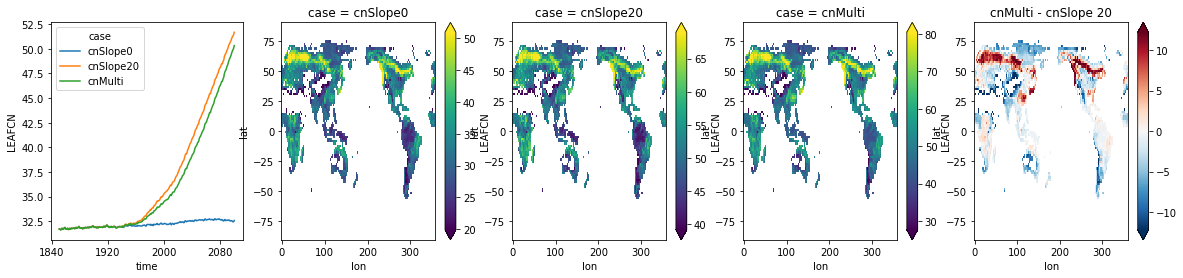

In [22]:
## Leaf and litter CN plots
# Include NPP, Nmin, Nfix, LITTERCN
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['LEAFCN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(1):
    fig, ax = plt.subplots(1, 5, figsize=(20,4))
    ann_Awgt.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    X = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')[EcoVars[i]]
    z = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-1,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'LEAFCN':
        zdiff.plot(robust = True, ax = ax[4])#, cmap = 'Blues_r')
        plt.title('cnMulti - cnSlope 20');
        z.plot(robust = True, ax = ax[2])
        z20.plot(robust = True, ax = ax[3])
        X.plot(robust = True, ax = ax[1])

## Plots demonstrating C:N change implemented (Fig 1)

IndexError: index 2 is out of bounds for axis 0 with size 2

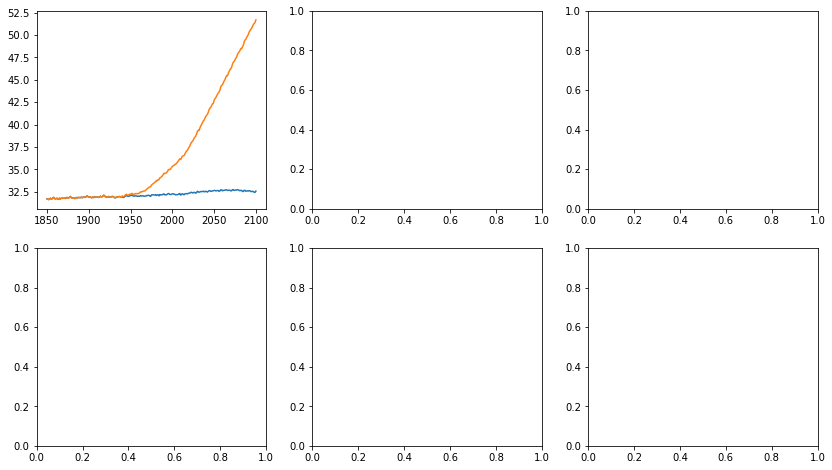

In [96]:
## Leaf and litter CN plots
# Include NPP, Nmin, Nfix, LITTERCN
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['LEAFCN', 'LITCN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

VarsCont = ann_Awgt.isel(case = 0)
VarsCont.attrs = ann_Awgt.attrs
Vars1 = ann_Awgt.isel(case = 1)
Vars1.attrs = ann_Awgt.attrs

for i in range(2):
    fig, axs = plt.subplots(2, 3,  figsize=(14,8))
    #fig, ax = plt.subplots(1, 3, figsize =[20,4])
    #axs[0,i].ann_Awgt.get(EcoVars[i]).plot(hue='case')#, ax = ax[0]);
    axs[0,i].plot(VarsCont.coords['time.year'], VarsCont.get(EcoVars[i]),label = "control")
    axs[0,i].plot(Vars1.coords['time.year'], Vars1.get(EcoVars[i]),label = "slope20");
    #axs[0,i].plt.title(EcoVars[i]);
        
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    z.attrs = dsAnn.get(EcoVars[i]).attrs
    a = map_function(zdiff, axs = ax[2])
    b = map_function(z);
   
 ##Should I select another color scheme for these maps? Can I change label on the 2nd map of each set? 


In [ ]:

fig = plt.figure()

ax1 = plt.subplot2grid((1,3), (0,0))
ax2 = plt.subplot2grid((1,3), (0,1))
ax3 = plt.subplot2grid((1,3), (0,2))

#map1 = Basemap(projection='ortho', lon_0 = 0, lat_0 = 40, ax=ax1)
map2 = map_function(zdiff, ax = ax2)
map3 = map_function(z, ax = ax3)



## C Cycling plots (Figure 2)
 - NPP, line plot, map of control, map of cnMulti - control
 - HR, line plot, map of control, map of cnMulti - control
 
 Notes: include HR only but wanted to look at ER too. ER/GPP are more similar, HR/NPP more similar. 

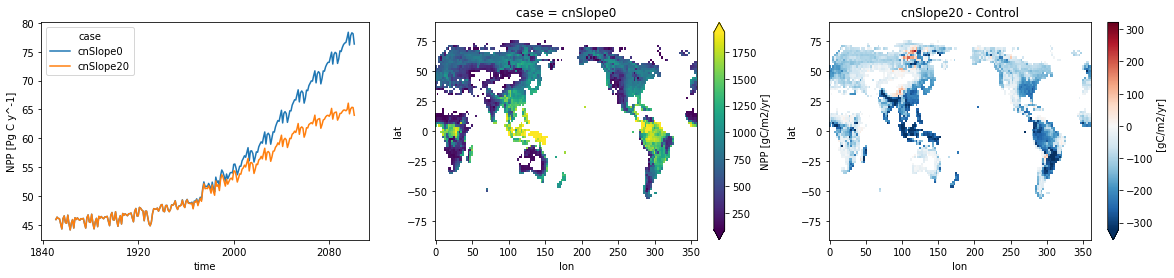

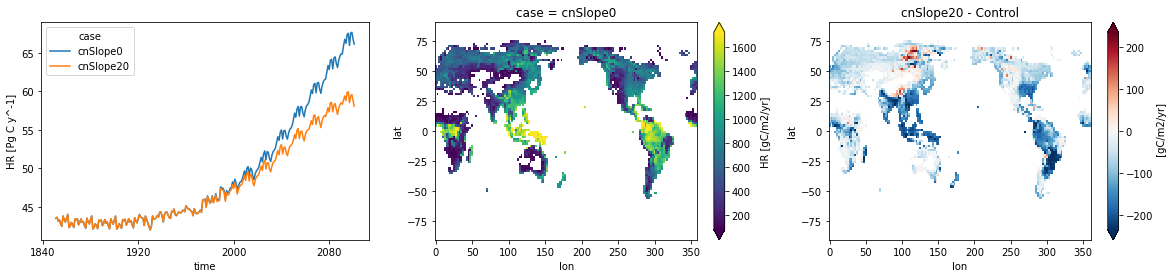

In [23]:
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['NPP', 'HR' ] #'ER'
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(2):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_glob_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    z.attrs = dsAnn.get(EcoVars[i]).attrs
    zdiff.attrs[EcoVars[i]] = dsAnn.get(EcoVars[i]).attrs

    if EcoVars[i] == 'NPP':
        z.plot(robust = True, ax = ax[1])
        plt.title('NPP Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('cnSlope20 - Control')
    if EcoVars[i] == 'HR':
        z.plot(robust = True, ax = ax[1])
        plt.title('HR Control')
        zdiff.plot(robust = True, ax = ax[2])# cmap = 'Blues_r') ;
        plt.title('cnSlope20 - Control')
    # if EcoVars[i] == 'ER':
    #     z.plot(robust = True, ax = ax[1])
    #     plt.title('ER Control')
    #     zdiff.plot(robust = True, ax = ax[2], cmap = 'Blues_r') ;
    #     plt.title('cnSlope20 - Control')

### For these plots, should I change color scheme of maps? 

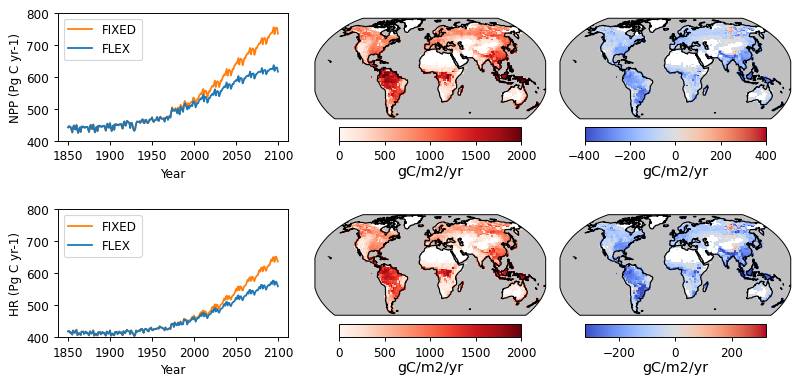

In [24]:
proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['NPP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')['NPP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(11, 5), dpi=86)
spec = fig.add_gridspec(20, 60)

ax2 = fig.add_subplot(spec[0:7, 21:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('NPP 2100')
im = z.plot(x='lon', y='lat',
                  vmin=0, vmax=2000,
                  cmap='Reds',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax = fig.add_subplot(spec[7:8,23:38])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("gC/m2/yr", y=-3, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')

ax3 = fig.add_subplot(spec[0:7, 41:60], projection=proj)
ax3.add_feature(cfeature.OCEAN, facecolor='silver')
ax3.coastlines()
ax3.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax3.set_title('Difference between Fixed and Flex in 2100')
im = zdiff.plot(x='lon', y='lat',
                  vmin=-400, vmax=400,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax2 = fig.add_subplot(spec[7:8,43:58])
cb2 = fig.colorbar(im, cax=cax2, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax2.set_title("gC/m2/yr", y=-3, fontsize = 12)
cax2.xaxis.set_ticks_position('bottom')


ax1 = fig.add_subplot(spec[0:8, :19])
NPP1 = ann_Awgt.isel(case = 1)
NPP1.attrs['NPP'] = ann_glob.get('NPP').attrs
NPP0 = ann_Awgt.isel(case = 0)
NPP0.attrs['NPP'] = ann_glob.get('NPP').attrs

ax1.plot(ann_Awgt_sub.coords['time.year'], NPP0.get('NPP'), label = "FIXED", color = "#ff7f0e");
ax1.plot(ann_Awgt_sub.coords['time.year'], NPP1.get('NPP'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('NPP (Pg C yr-1)')
ax1.set_title('');
ax1.legend(loc='upper left');
ax1.set_ylim(400,800)

###############Start HR Set 
z2 = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['HR']# Climatology for last 10 years of data
zMulti2 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')['HR']
zdiff2 = zMulti2 - z2
zdiff2 = utils.cyclic_dataarray(zdiff)


ax2 = fig.add_subplot(spec[12:19, 21:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('HR 2100')
im = z2.plot(x='lon', y='lat',
                  vmin=0, vmax=2000,
                  cmap='Reds',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax3 = fig.add_subplot(spec[-1:,23:38])
cb3 = fig.colorbar(im, cax=cax3, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax3.set_title("gC/m2/yr", y=-3, fontsize = 12)
cax3.xaxis.set_ticks_position('bottom')

ax3 = fig.add_subplot(spec[12:19, 41:60], projection=proj)
ax3.add_feature(cfeature.OCEAN, facecolor='silver')
ax3.coastlines()
ax3.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax3.set_title('Difference between Fixed and Flex in 2100')
im = zdiff2.plot(x='lon', y='lat',
                  #vmin=-400, vmax=400,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax3 = fig.add_subplot(spec[-1:,43:58])
cb3 = fig.colorbar(im, cax=cax3, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax3.set_title("gC/m2/yr", y=-3, fontsize = 12)
cax3.xaxis.set_ticks_position('bottom')

ax1 = fig.add_subplot(spec[12:20, :19])
NPP1 = ann_Awgt.isel(case = 1)
NPP1.attrs['NPP'] = ann_glob.get('NPP').attrs
NPP0 = ann_Awgt.isel(case = 0)
NPP0.attrs['NPP'] = ann_glob.get('NPP').attrs

ax1.plot(ann_Awgt_sub.coords['time.year'], NPP0.get('HR'), label = "FIXED", color = '#ff7f0e');
ax1.plot(ann_Awgt_sub.coords['time.year'], NPP1.get('HR'), label = "FLEX", color = '#1f77b4' );
ax1.set_xlabel('Year')
ax1.set_ylabel('HR (Pg C yr-1)')
ax1.set_title('');
ax1.legend(loc='upper left');
ax1.set_ylim(400,800);





## NBP Plots (Fig. 3, or maybe move this up? This is the central figure)
4 panel plot
    a) annual average NPB, line plot
    b) cumulative NBP, line plot
    c) Map, control case NBP 2100
    d) Map, cnMulti - control case 2100

In [19]:
# Cumulative annual flux over time   
cNBP = {}
cNBP['NBP'] = ann_glob['NBP'].cumsum(dim='time').load()

In [20]:
##Make NBP part of ann_glob dataframe
dsAnn['cumNBP'] = dsAnn['NBP'].cumsum(dim='time').load()
dsAnn['cumNBP'].attrs['units'] = 'gC/m2'

### Read in csv file of 2016 GCP data to add to NBP plot


In [21]:
gcp = pd.read_csv('GCP_2016.csv')

In [22]:
UC = 0.8
landHigh = gcp.Land - gcp.LULCC + UC
landLow = gcp.Land - gcp.LULCC - UC
land = gcp.Land- gcp.LULCC
cum_Land = land.cumsum()
cum_LandH = landHigh.cumsum()
cum_LandL =  landLow.cumsum()

In [23]:
from datetime import date

start = date(1960, 1, 1) 
end = date(2016, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]

start2 = date(1960, 1, 1) 
end2 = date(2099, 1, 1)

year_range2 = [year for year in range(start2.year, end2.year +1)]

### Read in CMIP data

In [24]:
cmip = '/glade/scratch/wwieder/CMIP6_annual_nbp.nc'
CMIP6 = xr.open_mfdataset(cmip, decode_times=True)
CMIP6

<xarray.Dataset>
Dimensions:  (year: 251, model: 11)
Coordinates:
  * year     (year) int32 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: model
Data variables:
    nbp      (model, year) float64 dask.array<chunksize=(11, 251), meta=np.ndarray>

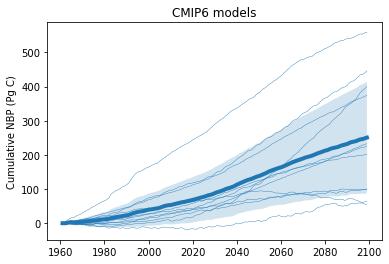

In [25]:
CMIP6_short = CMIP6.sel(year=slice('1960-12-16','2099-12-16'))

models = ['ACCESS-ESM1-5','CanESM5','CESM2',
          'CMCC-CM2-SR5','CNRM-ESM2-1','GFDL-ESM4',
          #'GISS-E2-1-H', SSP data from GISS are not correct
          'INM-CM5-0','IPSL-CM6A-LR','MIROC-ES2L',
          'MPI-ESM1-2-LR','UKESM1-0-LL',
         ]

x = CMIP6_short.year
y = CMIP6_short.nbp.cumsum(dim='year').mean('model')
y2 = CMIP6_short.nbp.cumsum(dim='year').std('model')
plt.plot(x,y,linewidth=4)
plt.fill_between(x,y+y2,y-y2, alpha=0.2) 
for m in range(len(models)):
    plt.plot(x,CMIP6_short.nbp.isel(model=m).cumsum(dim='year').values,
             linewidth=0.4, color='tab:blue')
plt.ylabel('Cumulative NBP (Pg C)')
plt.title('CMIP6 models')  ;

In [2]:
###Plot a) Annual average NBP
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
fig, axs = plt.subplots(2, 2,  figsize=(14,8))
fig.tight_layout(pad=4)
NBP1 = ann_Awgt.isel(case = 1)
NBP1.attrs['NBP'] = ann_glob.get('NBP').attrs
NBP0 = ann_Awgt.isel(case = 0)
NBP0.attrs['NBP'] = ann_glob.get('NBP').attrs

axs[0,0].plot(ann_Awgt_sub.coords['time.year'], NBP0.get('NBP'), label = "control");
axs[0,0].plot(ann_Awgt_sub.coords['time.year'], NBP1.get('NBP'), label = "slope20");
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Annual NBP (pg C yr-1)')
axs[0,0].set_title('Average Annual NBP');
axs[0,0].legend(loc='upper left');


### Plotb)
axs[0,1].plot(year_range,cum_Land, linewidth = 3, label = "Obs", color = "green")
axs[0,1].plot(year_range,cum_LandH, color = 'grey')
axs[0,1].plot(year_range,cum_LandL, color = 'grey')
axs[0,1].fill_between(year_range, cum_LandH,cum_LandL, color='grey')
axs[0,1].hlines(0,1960, 2100, color = 'black', linestyles = 'dashed')
control = cNBP['NBP'].sel(time = slice('1960-12-16','2099-12-16'), case = 'cnSlope0').values + (93.3203492)
cnMulti = cNBP['NBP'].sel(time = slice('1960-12-16','2099-12-16'), case = 'cnSlope20').values + (93.92729433)
axs[0,1].plot(year_range2,control, linewidth = 3, label = 'Control', color = "#1f77b4")
axs[0,1].plot(year_range2,cnMulti, linewidth = 3, label = "slope20", color = "#ff7f0e");
axs[0,1].set_title('Cumulative Land Uptake')
axs[0,1].set_ylabel('Cumulative NBP (Pg C)');
axs[0,1].set_xlabel('Year')
axs[0,1].legend();


### plot c) first map, just use 2100 or average of last 10 years? 
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['cumNBP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['cumNBP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']
##Metadata needs added here for plots. 
zdiff.attrs = dsAnn.get('cumNBP').attrs
z.attrs = dsAnn.get('cumNBP').attrs
z.plot(robust = True, ax = axs[1,0]);#, cmap = 'Blues_r') ;
axs[1,0].set_title('Cumulative NBP in Control 2100, pg C')
zdiff.plot(robust = True, ax = axs[1,1]); #, cmap = 'Blues_r') 
axs[1,1].set_title('Difference in NBP, Slope20 - control');
# plt.title('CN Multi - Control')



NameError: name 'dsAnn' is not defined

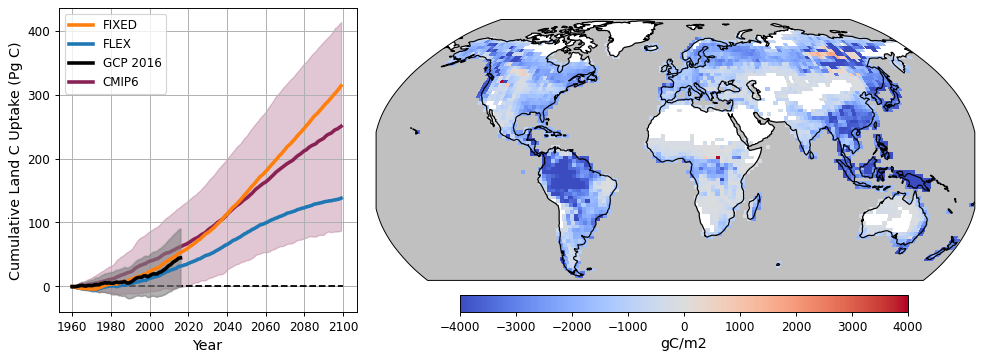

In [27]:
proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['cumNBP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')['cumNBP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(15, 5), dpi=86)
spec = fig.add_gridspec(16, 60)

ax2 = fig.add_subplot(spec[0:, 24:], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Difference in land C uptake between Fixed and Flex by 2100')
im = zdiff.plot(x='lon', y='lat',
                  vmin=-4000, vmax=4000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)

#ax2.imshow(
#    zdiff, cmap="RdBu", vmin=-4000, vmax=4000,extent=[-180, 180,90,-90], transform=ccrs.PlateCarree())


cax = fig.add_subplot(spec[-1:,29:56])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("gC/m2", y=-2.5, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')

# grd = ax2.gridlines(
#     draw_labels=True, 
#     xlocs=range(-180, 181, 90), 
#     ylocs=range(-60, 61, 30), 
#     color='k',
# )
# grd.top_labels = False

#ax1.add_feature(cfeature.LAND, facecolor="#eeeeee", zorder=99)

ax1 = fig.add_subplot(spec[1:16, 5:23])
ax1.grid(zorder = 0)
ax1.hlines(0,1960, 2100, color = 'black', linestyles = 'dashed')
control = cNBP['NBP'].sel(time = slice('1960-12-16','2100-11-16'), case = 'cnSlope0').values + (93.3203492)
cnMulti = cNBP['NBP'].sel(time = slice('1960-12-16','2100-11-16'), case = 'cnSlope20').values + (93.92729433)
ax1.plot(year_range2,control, linewidth = 3, label = 'FIXED', color = "#ff7f0e", zorder = 5)
ax1.plot(year_range2,cnMulti, linewidth = 3, label = "FLEX", color = "#1f77b4", zorder = 4)
ax1.plot(year_range,cum_Land, linewidth = 3, label = "GCP 2016", color = "black", zorder = 6)
ax1.plot(year_range,cum_LandH, color = 'grey', alpha = 0.2, zorder = 3)
ax1.plot(year_range,cum_LandL, color = 'grey',alpha = 0.2, zorder = 3)
ax1.fill_between(year_range, cum_LandH,cum_LandL, color='grey', zorder = 3, alpha = 0.6)
ax1.plot(x,y,linewidth=3, color = '#882255', label = "CMIP6", zorder =2)
ax1.fill_between(x,y+y2,y-y2, alpha=0.25, color = '#882255', zorder = 1) 

#ax1.set_title('Cumulative Land Uptake')
ax1.set_ylabel('Cumulative Land C Uptake (Pg C)', fontsize = 12);
ax1.set_xlabel('Year', fontsize =12)
ax1.legend();

#

In [30]:
#control2 = cNBP['NBP'].sel(time = slice('1960-12-16','2100-12-16'), case = 'cnSlope0').values + (93.92729433)
cnMulti2 = cNBP['NBP'].sel(time = slice('1960-12-16','2100-12-16'), case = 'cnSlope20').values + (93.92729433)
cnMulti2

#control2
#cnMulti
#cnMulti = cNBP['NBP'].sel(time = slice('2099-12-16'), case = 'cnSlope20').values 
#4.45597111e+01-223.23407566
3.17161370e+02 - 1.38023910e+02

179.13745999999998

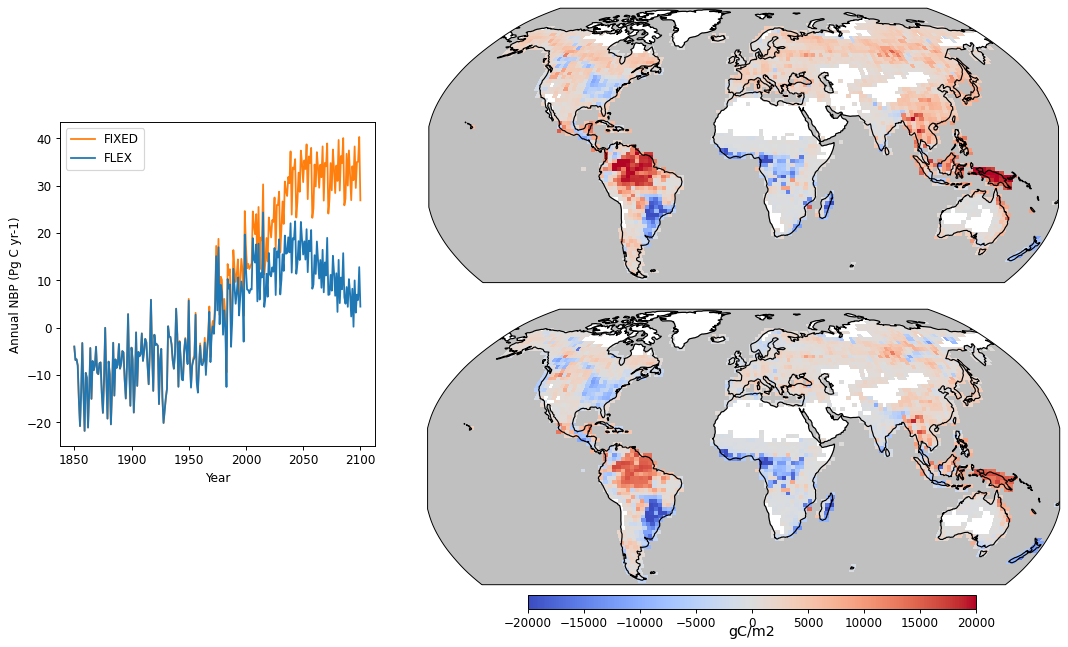

In [59]:
proj = ccrs.Robinson(central_longitude=0)
zx = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['cumNBP']# Climatology for last 10 years of data
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(15, 10), dpi=86)
spec = fig.add_gridspec(40, 60)


ax2 = fig.add_subplot(spec[3:20, 22:60], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Cumulative NBP in Fixed, 2100')
im = zx.plot(x='lon', y='lat',
                  vmin=-20000, vmax=20000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)

# cax = fig.add_subplot(spec[19:20,24:55])
# cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
# cax.set_title("gC/m2", y=-2.5, fontsize = 12)
# cax.xaxis.set_ticks_position('bottom')


minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
NBP1 = ann_Awgt.isel(case = 1)
NBP1.attrs['NBP'] = ann_glob.get('NBP').attrs
NBP0 = ann_Awgt.isel(case = 0)
NBP0.attrs['NBP'] = ann_glob.get('NBP').attrs
ax1 = fig.add_subplot(spec[10:30, :19])
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP0.get('NBP'), label = "FIXED", color = "#ff7f0e" );
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP1.get('NBP'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('Annual NBP (Pg C yr-1)')
#ax1.set_title('Average Annual NBP');
ax1.legend(loc='upper left');



##Add a 3rd plot

zy = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')['cumNBP']# Climatology for last 10 years of data


ax3 = fig.add_subplot(spec[21:39, 22:60], projection=proj)
ax3.add_feature(cfeature.OCEAN, facecolor='silver')
ax3.coastlines()
ax3.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Cumulative NBP in Fixed, 2100')
im2 = zy.plot(x='lon', y='lat',
                  #vmin=-4000, vmax=4000,
                  cmap='coolwarm',
                  vmin = -20000,
                  vmax = 20000,
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)

cax2 = fig.add_subplot(spec[-1:,28:55])
cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")#, vmin = -15000, vmax = 15000)#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax2.set_title("gC/m2", y=-2.5, fontsize = 12)
cax2.xaxis.set_ticks_position('bottom')



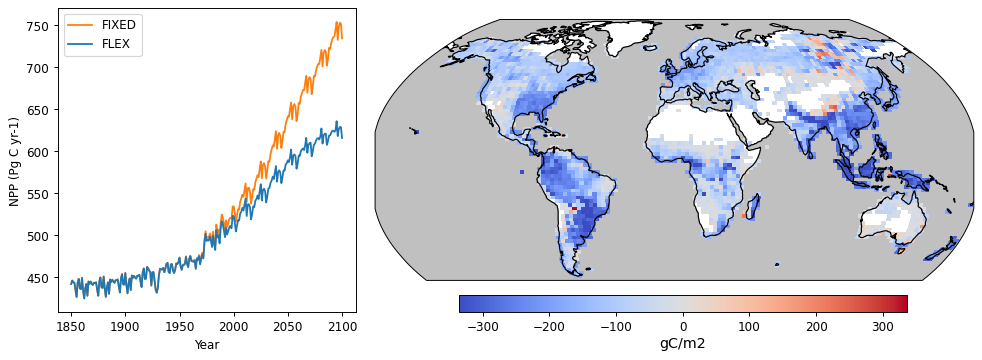

In [26]:
proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['NPP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['NPP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(15, 5), dpi=86)
spec = fig.add_gridspec(16, 60)

ax2 = fig.add_subplot(spec[0:, 24:], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Cumulative NBP in Fixed, 2100')
im = zdiff.plot(x='lon', y='lat',
                  #vmin=-4000, vmax=4000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)

#ax2.imshow(
#    zdiff, cmap="RdBu", vmin=-4000, vmax=4000,extent=[-180, 180,90,-90], transform=ccrs.PlateCarree())


cax = fig.add_subplot(spec[-1:,29:56])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("gC/m2", y=-2.5, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')

# grd = ax2.gridlines(
#     draw_labels=True, 
#     xlocs=range(-180, 181, 90), 
#     ylocs=range(-60, 61, 30), 
#     color='k',
# )
# grd.top_labels = False

#ax1.add_feature(cfeature.LAND, facecolor="#eeeeee", zorder=99)

minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
NBP1 = ann_Awgt.isel(case = 1)
NBP1.attrs['NPP'] = ann_glob.get('NPP').attrs
NBP0 = ann_Awgt.isel(case = 0)
NBP0.attrs['NPP'] = ann_glob.get('NPP').attrs
ax1 = fig.add_subplot(spec[1:16, 5:23])
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP0.get('NPP'), label = "FIXED", color = "#ff7f0e" );
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP1.get('NPP'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('NPP (Pg C yr-1)')
#ax1.set_title('Average Annual NBP');
ax1.legend(loc='upper left');





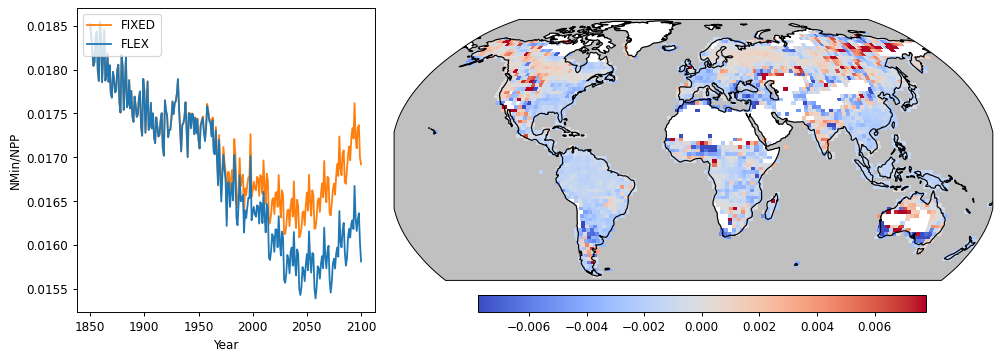

In [33]:
 proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['NMin_NPP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['NMin_NPP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(15, 5), dpi=86)
spec = fig.add_gridspec(16, 60)

ax2 = fig.add_subplot(spec[0:, 24:], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Cumulative NBP in Fixed, 2100')
im = zdiff.plot(x='lon', y='lat',
                  #vmin=-4000, vmax=4000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)


cax = fig.add_subplot(spec[-1:,29:56])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("", y=-2.5, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')


minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
NBP1 = ann_Awgt.isel(case = 1)
NBP1.attrs['Nmin_Npp'] = ann_glob.get('NPP').attrs
NBP0 = ann_Awgt.isel(case = 0)
NBP0.attrs['Nmin_Npp'] = ann_glob.get('NPP').attrs
ax1 = fig.add_subplot(spec[1:16, 5:23])
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP0.get('Nmin_Npp'), label = "FIXED", color = "#ff7f0e" );
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP1.get('Nmin_Npp'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('NMin/NPP')
#ax1.set_title('Average Annual NBP');
ax1.legend(loc='upper left');





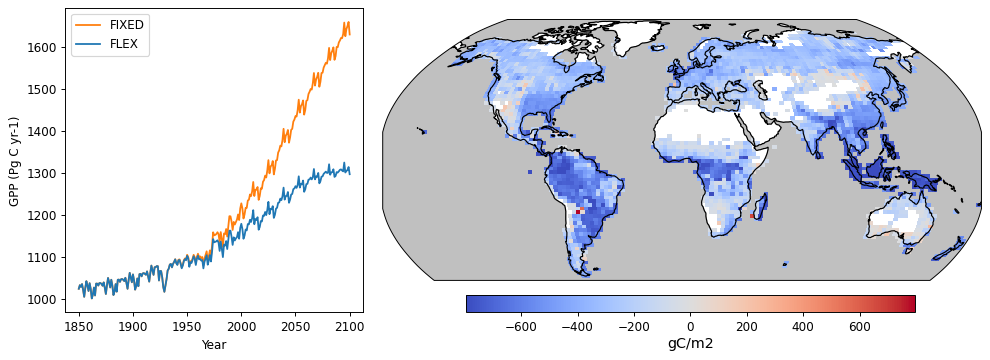

In [30]:
proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['GPP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['GPP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(15, 5), dpi=86)
spec = fig.add_gridspec(16, 60)

ax2 = fig.add_subplot(spec[0:, 24:], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Cumulative NBP in Fixed, 2100')
im = zdiff.plot(x='lon', y='lat',
                  #vmin=-4000, vmax=4000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)

#ax2.imshow(
#    zdiff, cmap="RdBu", vmin=-4000, vmax=4000,extent=[-180, 180,90,-90], transform=ccrs.PlateCarree())


cax = fig.add_subplot(spec[-1:,29:56])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("gC/m2", y=-2.5, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')

# grd = ax2.gridlines(
#     draw_labels=True, 
#     xlocs=range(-180, 181, 90), 
#     ylocs=range(-60, 61, 30), 
#     color='k',
# )
# grd.top_labels = False

#ax1.add_feature(cfeature.LAND, facecolor="#eeeeee", zorder=99)

minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
NBP1 = ann_Awgt.isel(case = 1)
NBP1.attrs['GPP'] = ann_glob.get('GPP').attrs
NBP0 = ann_Awgt.isel(case = 0)
NBP0.attrs['GPP'] = ann_glob.get('GPP').attrs
ax1 = fig.add_subplot(spec[1:16, 5:23])
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP0.get('GPP'), label = "FIXED", color = "#ff7f0e" );
ax1.plot(ann_Awgt_sub.coords['time.year'], NBP1.get('GPP'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('GPP (Pg C yr-1)')
#ax1.set_title('Average Annual NBP');
ax1.legend(loc='upper left');






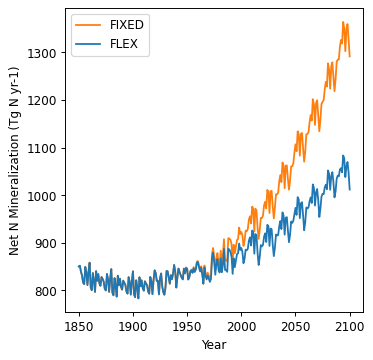

In [25]:
# proj = ccrs.Robinson(central_longitude=0)
# z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['NET_NMIN']# Climatology for last 10 years of data
# zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['NET_NMIN']
# zdiff = zMulti - z
# zdiff = utils.cyclic_dataarray(zdiff)
# lat = zdiff.coords['lat']
# lon = zdiff.coords['lon']

fig = plt.figure(figsize=(15, 5), dpi=86)
spec = fig.add_gridspec(16, 60)


minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
NBP1 = ann_glob.isel(case = 1)
NBP1.attrs['NET_NMIN'] = ann_glob.get('NET_NMIN').attrs
NBP0 = ann_glob.isel(case = 0)
NBP0.attrs['NET_NMIN'] = ann_glob.get('NET_NMIN').attrs
ax1 = fig.add_subplot(spec[1:16, 5:23])
ax1.plot(ann_glob_sub.coords['time.year'], NBP0.get('NET_NMIN'), label = "FIXED", color = "#ff7f0e" );
ax1.plot(ann_glob_sub.coords['time.year'], NBP1.get('NET_NMIN'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('Net N Mineralization (Tg N yr-1)')
#ax1.set_title('Average Annual NBP');
ax1.legend(loc='upper left');

In [21]:
ann_Awgt_sub

<xarray.Dataset>
Dimensions:             (time: 251, case: 2)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * case                (case) <U9 'cnSlope0' 'cnSlope20'
Data variables: (12/23)
    NPP                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    GPP                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    LEAFCN              (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QVEGT               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QVEGE               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QSOIL               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    ...                  ...
    RAIN                (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    SNOW                (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    LITCN               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    ET                  (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    WUE                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    WaterYield          (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
Attributes: (12/14)
    TOTVEGC:             {'units': 'Pg C'}
    GPP:                 {'units': 'Pg C y^-1'}
    NPP:                 {'units': 'Pg C y^-1'}
    NBP:                 {'units': 'Pg C y^-1'}
    HR:                  {'units': 'Pg C y^-1'}
    ER:                  {'units': 'Pg C y^-1'}
    ...                  ...
    LITCN:               {'units': 'gC/gN'}
    LEAFCN:              {}
    FPI:                 {}
    ET:                  {'units': 'mm/yr'}
    QRUNOFF_TO_COUPLER:  {'units': 'mm/yr'}
    WaterYield:          {'units': 'mm/yr'}

In [48]:
controlAvg = ann_Awgt_sub['NBP'].sel(time = slice('1960-12-16','2100-12-16'), case = 'cnSlope0').values 
cnMultiAvg = ann_Awgt_sub['NBP'].sel(time = slice('1960-12-16','2100-12-16'), case = 'cnSlope20').values
#cnMulti2
#controlAvg
#cnMultiAvg
26.89430207 - 4.45647981

22.437822259999997

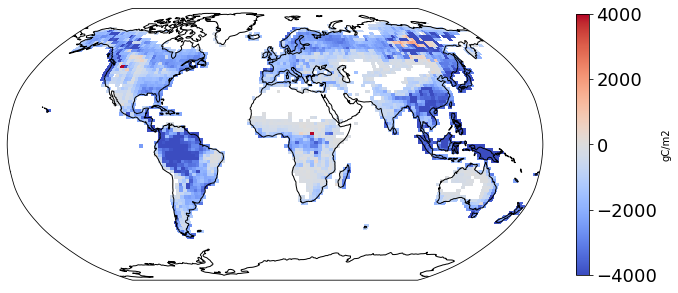

In [50]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='white')

plt.figure(figsize=[12,8])
p = zdiff.plot(x='lon', y='lat',
                  vmin=-4000, vmax=4000,
                  cmap='coolwarm',
                  subplot_kws=subplot_kws,
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)

# add separate colorbar
cb = plt.colorbar(p, shrink=0.6, label = 'gC/m2')
cb.ax.tick_params(labelsize=18)
p.axes.coastlines();

#p.axes.gridlines(color='black', alpha=0.5, linestyle='--');
    

## Water cycle varibles (Choose one for Fig 4, either maps/line plots or scatter plot variation)


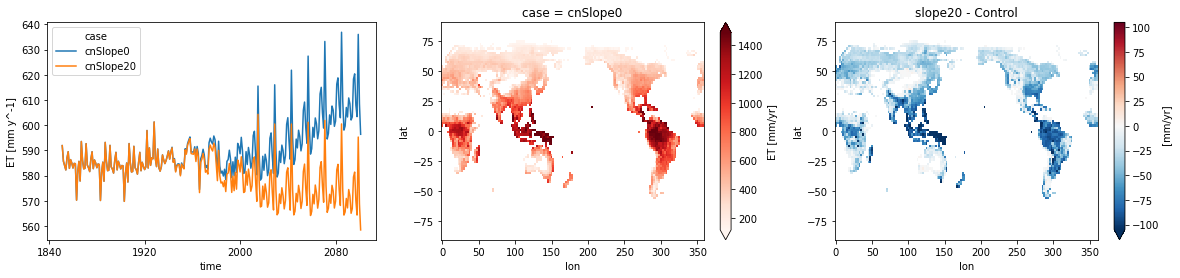

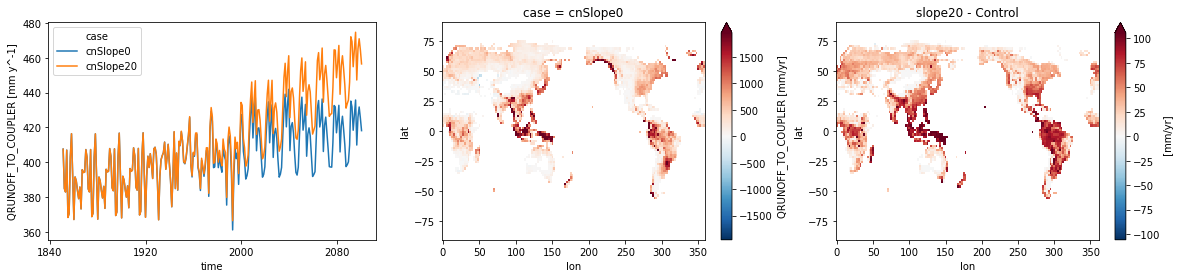

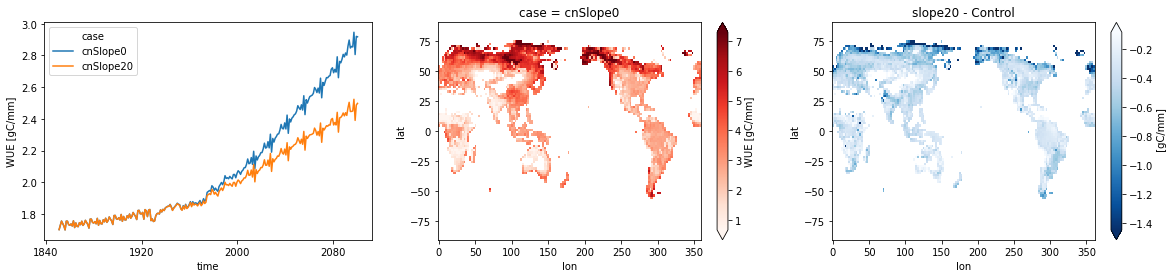

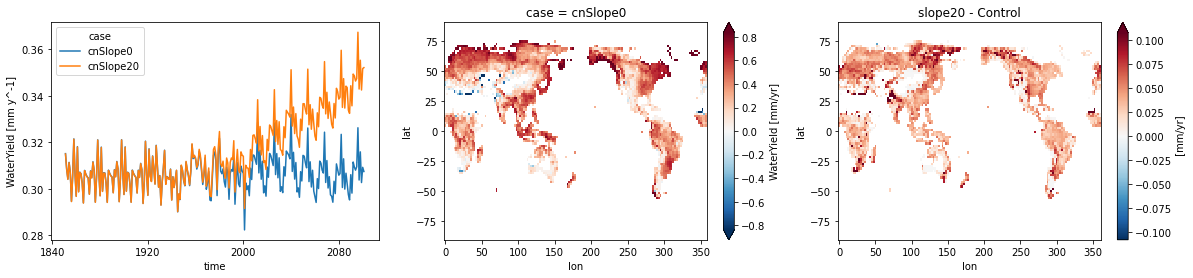

In [26]:
### Plot ET and runoff

EcoVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WUE', 'WaterYield' ]
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(4):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_Awgt_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    z.attrs = dsAnn.get(EcoVars[i]).attrs
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'ET':
        z.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('ET Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
    if EcoVars[i] == 'QRUNOFF_TO_COUPLER':
        z.plot(robust = True, ax = ax[1])
        plt.title('Runoff Control')
        zdiff.plot(robust = True, ax = ax[2])# cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
    if EcoVars[i] == 'WUE':
        z.plot(robust = True, ax = ax[1], cmap = 'Reds')
        plt.title('WUE Control')
        zdiff.plot(robust = True, ax = ax[2], cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
    if EcoVars[i] == 'WaterYield':
        z.plot(robust = True, ax = ax[1])#, cmap = 'Reds')
        plt.title('WaterYield Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
        
##Notes/to do: Units need added on maps, lost somewhere further up. Also runoff and wateryield units seem weird? Should be mm/yr, which is what the value says but the numbers themselves seem a little funny. 



In [27]:
#ann_Awgt_sub.ET.isel(case = 0, time = slice (-10,None)).values
ann_Awgt_sub.ET.isel(case = 1, time = slice (-10,None)).values
#ann_Awgt_sub.ET.isel(case = 1).values
#Slope 0 (608.53353838 + 602.05290298 + 603.31591336 + 618.29147974 + 620.37901968 + 607.94430569 + 603.3812648 + 636.0542823 + 608.53033466 + 596.37495261)/10
#Slope20 (571.87976933 + 565.00309937 + 566.8789763 + 579.41032592 +
       #581.3715239 + 570.07268415 + 564.30141627 + 595.28413673 +
       #568.81678945+ 558.40271398)/10
610.4857994199999 - 572.14214354

38.343655879999915

In [28]:
#ann_Awgt_sub.QRUNOFF_TO_COUPLER.isel(case = 0, time = slice (-10,None)).values
ann_Awgt_sub.QRUNOFF_TO_COUPLER.isel(case = 1, time = slice (-10,None)).values
#ann_Awgt_sub.ET.isel(case = 1).values
#Slope0(435.08594954 + 431.7078536 + 418.32671888 + 427.181179  +
       #435.70225542 + 409.82274595 + 425.83132087 + 431.68667198 + 425.46656524+ 418.10010515)/10
#Slope 20 (472.0155521 + 469.23642059 + 454.80815278 + 464.53701837 +
       #474.61712699 + 447.18886598 + 465.02931106 + 470.87344927 + 464.58126266 + 456.42888486)/10
425.891136563 - 463.93160446600007

-38.04046790300009

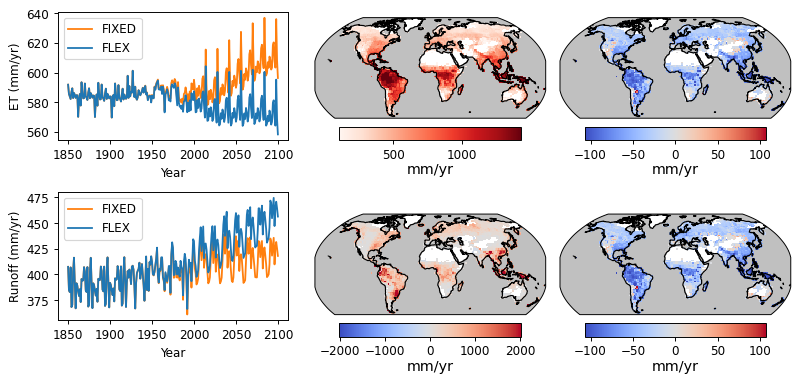

In [29]:
proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['ET']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['ET']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(11, 5), dpi=86)
spec = fig.add_gridspec(20, 60)

ax2 = fig.add_subplot(spec[0:7, 21:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('ET 2100')
im = z.plot(x='lon', y='lat',
                  #vmin=0, vmax=2000,
                  cmap='Reds',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax = fig.add_subplot(spec[7:8,23:38])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("mm/yr", y=-3, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')

ax3 = fig.add_subplot(spec[0:7, 41:60], projection=proj)
ax3.add_feature(cfeature.OCEAN, facecolor='silver')
ax3.coastlines()
ax3.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax3.set_title('Difference between Fixed and Flex in 2100')
im = zdiff.plot(x='lon', y='lat',
                  #vmin=-400, vmax=400,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax2 = fig.add_subplot(spec[7:8,43:58])
cb2 = fig.colorbar(im, cax=cax2, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax2.set_title("mm/yr", y=-3, fontsize = 12)
cax2.xaxis.set_ticks_position('bottom')


ax1 = fig.add_subplot(spec[0:8, :19])
ET1 = ann_Awgt.isel(case = 1)
ET1.attrs['ET'] = ann_glob.get('ET').attrs
ET0 = ann_Awgt.isel(case = 0)
ET0.attrs['ET'] = ann_glob.get('ET').attrs

ax1.plot(ann_Awgt_sub.coords['time.year'], ET0.get('ET'), label = "FIXED", color ='#ff7f0e');
ax1.plot(ann_Awgt_sub.coords['time.year'], ET1.get('ET'), label = "FLEX", color = '#1f77b4');
ax1.set_xlabel('Year')
ax1.set_ylabel('ET (mm/yr)')
ax1.set_title('');
ax1.legend(loc='upper left');
#ax1.set_ylim(400,800)

###############Start HR Set 
z2 = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['QRUNOFF_TO_COUPLER']# Climatology for last 10 years of data
zMulti2 = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['QRUNOFF_TO_COUPLER']
zdiff2 = zMulti2 - z2
zdiff2 = utils.cyclic_dataarray(zdiff)


ax2 = fig.add_subplot(spec[12:19, 21:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Runoff 2100')
im = z2.plot(x='lon', y='lat',
                  #vmin=0, vmax=2000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax3 = fig.add_subplot(spec[-1:,23:38])
cb3 = fig.colorbar(im, cax=cax3, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax3.set_title("mm/yr", y=-3, fontsize = 12)
cax3.xaxis.set_ticks_position('bottom')

ax3 = fig.add_subplot(spec[12:19, 41:60], projection=proj)
ax3.add_feature(cfeature.OCEAN, facecolor='silver')
ax3.coastlines()
ax3.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax3.set_title('Difference between Fixed and Flex in 2100')
im = zdiff2.plot(x='lon', y='lat',
                  #vmin=-400, vmax=400,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax3 = fig.add_subplot(spec[-1:,43:58])
cb3 = fig.colorbar(im, cax=cax3, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax3.set_title("mm/yr", y=-3, fontsize = 12)
cax3.xaxis.set_ticks_position('bottom')

ax1 = fig.add_subplot(spec[11:19, :19])
RO1 = ann_Awgt.isel(case = 1)
RO1.attrs['QRUNOFF_TO_COUPLER'] = ann_glob.get('QRUNOFF_TO_COUPLER').attrs
RO0 = ann_Awgt.isel(case = 0)
RO0.attrs['QRUNOFF_TO_COUPLER'] = ann_glob.get('QRUNOFF_TO_COUPLER').attrs

ax1.plot(ann_Awgt_sub.coords['time.year'], RO0.get('QRUNOFF_TO_COUPLER'), label = "FIXED", color = "#ff7f0e");
ax1.plot(ann_Awgt_sub.coords['time.year'], RO1.get('QRUNOFF_TO_COUPLER'), label = "FLEX", color = '#1f77b4');
ax1.set_xlabel('Year')
ax1.set_ylabel('Runoff (mm/yr)')
ax1.set_title('');
ax1.legend(loc='upper left');
#ax1.set_ylim(400,800);



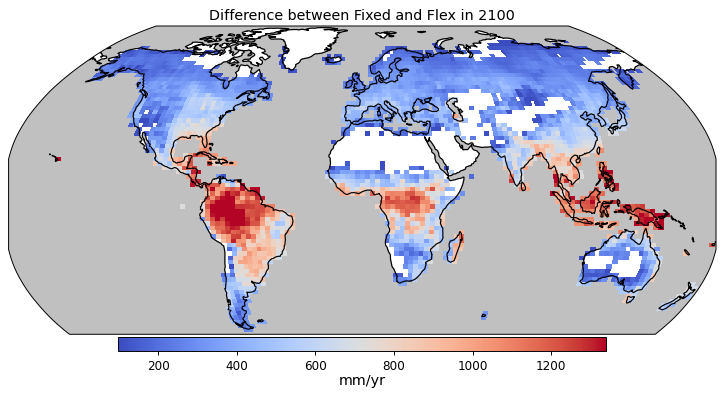

In [30]:
z3 = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['ET']
z4 = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['ET']
zdiff3 = z4 - z3
zdiff3 = utils.cyclic_dataarray(zdiff3)

fig = plt.figure(figsize=(11, 5), dpi=86)
spec = fig.add_gridspec(20, 60)
ax1 = fig.add_subplot(spec[0:19, 0:60], projection=proj)
ax1.add_feature(cfeature.OCEAN, facecolor='silver')
ax1.coastlines()
ax1.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
ax1.set_title('Difference between Fixed and Flex in 2100')
im = z4.plot(x='lon', y='lat',
                  #vmin=-400, vmax=400,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax1 = fig.add_subplot(spec[-1:,10:50])
cb1 = fig.colorbar(im, cax=cax1, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax1.set_title("mm/yr", y=-3, fontsize = 12)
cax1.xaxis.set_ticks_position('bottom')

#### Change in GPP vs Change in ET, control vs treatment scatterplot

In [31]:
#useful function from CTSM workshop 
# #Defining generic function for scatter plots
def detailed_scatter (x, y, color):
    plt.scatter (x,y, marker="o",color = color)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x,line,'black', label='y={:.2f}x+{:.2f}'.format(slope,intercept)+" (R2="+"{:.2f}".format(r_value)+")")
    plt.legend(fontsize=13)

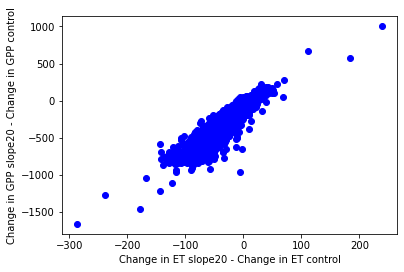

In [32]:
#plt.figure(num=None, figsize=(15, 5),  facecolor='w', edgecolor='k')
minET = 1
dsAnn = dsAnn.where(dsAnn.ET.min('time') > minET)

GPPControlStart = dsAnn.isel(case=0,time=slice(0,1)).mean('time')['GPP']
GPPControlEnd = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['GPP']
GPPSlope20Start = dsAnn.isel(case=1,time=slice(0,1)).mean('time')['GPP']
GPPSlope20End = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['GPP']
DiffGPP = (GPPSlope20End-GPPSlope20Start)-(GPPControlEnd-GPPControlStart)

ETControlStart = dsAnn.isel(case=0,time=slice(0,1)).mean('time')['ET']
ETControlEnd = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['ET']
ETSlope20Start = dsAnn.isel(case=1,time=slice(0,1)).mean('time')['ET']
ETSlope20End = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['ET']
DiffET = (ETSlope20End-ETSlope20Start)-(ETControlEnd-ETControlStart)

dsAnn['DiffGPPCont'] = GPPControlEnd - GPPControlStart
dsAnn['DiffGPPCont'].attrs['long_name'] = 'GPP Difference 2100 - 1850'
dsAnn['DiffETCont'] = ETControlEnd - ETControlStart
dsAnn['DiffETCont'].attrs['long_name'] = 'ET Difference 2100 - 1850'
dsAnn['DiffGPPSlope20'] = GPPSlope20End - GPPSlope20Start
dsAnn['DiffGPPSlope20'].attrs['long_name'] = 'GPP Difference 2100 - 1850'
dsAnn['DiffETSlope20'] = ETSlope20End - ETSlope20Start
dsAnn['DiffETSlope20'].attrs['long_name'] = 'ET Difference 2100 - 1850'

dsAnn['GPPControlEnd'] = GPPControlEnd 
dsAnn['GPPControlEnd'].attrs['long_name'] = 'GPP 2100'
dsAnn['ETControlEnd'] = ETControlEnd
dsAnn['ETControlEnd'].attrs['long_name'] = 'ET 2100'
dsAnn['GPPSlope20End'] = GPPSlope20End
dsAnn['GPPSlope20End'].attrs['long_name'] = 'GPP 2100'
dsAnn['ETSlope20End'] = ETSlope20End 
dsAnn['ETSlope20End'].attrs['long_name'] = 'ET 2100'






#plt.subplot(1, 3, 1)
plt.scatter(DiffET,DiffGPP, marker="o",color = 'b');
plt.ylabel('Change in GPP slope20 - Change in GPP control')
plt.xlabel('Change in ET slope20 - Change in ET control');
# plt.ylabel('CLM Latent Heat [W m-2]')
# plt.xlabel('CLM Canopy Evaporation [W m-2]')

In [33]:
dsAnnDrop

NameError: name 'dsAnnDrop' is not defined

In [ ]:
from scipy import signal,stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor

def scatter_function(X, Y, xlab=True, col='k', pos=1):#cb=0, cmap=None, ax=None, title=None, vmax=None, vmin=None):
    '''a function to make one subplot'''
    x= X.values
    y= Y.values
    y2 = y[~np.isnan(y)]#y.dropna()#np.where(y<10, y, np.nan)
    model = HistGradientBoostingRegressor().fit(x.reshape((-1, 1)), y2.reshape((-1,1)))
    R, p = stats.pearsonr(x,y)
    R = np.round(R, 2)
    slope = np.round(model.coef_,2)[0]
    print('p = '+str(p))
    
    xRange = np.array([x.min(),x.max()]).reshape(-1, 1)
    yPred = model.predict(xRange)
    yRange= np.array([y.min(),y.max()]).reshape(-1, 1)
    #print(yRange)
    xlim=xRange*1.1
    ylim=yRange*1.
    plt.plot(x, y,'o',color=col)
    plt.plot(xRange,yPred,color=col)
    if (pos==1): #upper left
        plt.text(xlim[0]*0.8,ylim[1]*0.9,'r = '+str(R),fontsize=12, color=col)
        plt.text(xlim[0]*0.8,ylim[1]*0.8,'slope = '+str(slope),fontsize=12, color=col);
    if (pos==2): #upper right
        plt.text(xlim[1]*0.6,ylim[1]*0.9,'r = '+str(R),fontsize=12, color=col)
        plt.text(xlim[1]*0.6,ylim[1]*0.8,'slope = '+str(slope),fontsize=12, color=col);
    if (pos==3): #lower right
        plt.text(xlim[1]*0.6,ylim[0]*0.8,'r = '+str(R),fontsize=12, color=col)
        plt.text(xlim[1]*0.6,ylim[0]*0.9,'slope = '+str(slope),fontsize=12, color=col);
    plt.xlim(xlim)
    #plt.ylim(-4.2,3.5)
    if xlab == True:  
        xlab = X.attrs['long_name']
    else:
        xlab = xlab
    plt.ylabel(Y.attrs['long_name']+' ('+Y.attrs['units']+')')
    plt.xlabel(xlab +' ('+X.attrs['units']+')')
        

In [ ]:
# dsAnnDrop = dsAnn.to_dataframe()
# dsAnnDrop = dsAnnDrop.dropna()
# dsAnn2 = dsAnn[~np.isnan(dsAnn).any('time')]
  # shape still (100, 22, 65)
plt.figure(figsize=[12,10])
scatter_function(dsAnn['DiffETCont'], dsAnn['DiffGPPCont'], col='blue')
#scatter_function(dsAnnDrop['DiffETSlope20'], dsAnnDrop['DiffGPPSlope20'], col='green', pos = 3)


In [ ]:
tempGPP = dsAnn[['DiffGPPCont']].to_array().values.ravel()
tempET = dsAnn[['DiffETCont']].to_array().values.ravel()
tempGPP = tempGPP[~np.isnan(tempGPP)]
tempET = tempET[~np.isnan(tempET)]
stats.linregress(tempET, tempGPP)


In [ ]:
tempGPP2 = dsAnn[['DiffGPPSlope20']].to_array().values.ravel()
tempET2 = dsAnn[['DiffETSlope20']].to_array().values.ravel()
tempGPP2 = tempGPP2[~np.isnan(tempGPP2)]
tempET2 = tempET2[~np.isnan(tempET2)]
stats.linregress(tempET2, tempGPP2)

In [ ]:
# Linear - Line of best fit
import seaborn as sns
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='DiffETCont', y='DiffGPPCont', data=dsAnn);

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [ ]:
## Could also plot changes for control and changes for slope20 as 2 different colors rather than subtracting them.
## These could also be 2 side by side plots
DiffGPPCont = GPPControlEnd - GPPControlStart
DiffETCont = ETControlEnd - ETControlStart
DiffGPPSlope20 = GPPSlope20End - GPPSlope20Start
DiffETSlope20 = ETSlope20End - ETSlope20Start

plt.figure(num=None, figsize=(12, 6),  facecolor='w', edgecolor='k')
plt.scatter(DiffETCont, DiffGPPCont, marker=".",color = 'b', label = "Control")
plt.scatter(DiffETSlope20, DiffGPPSlope20, marker=".",color = 'g', label = "Slope20");
plt.ylabel("Change in GPP (gC/m2/yr)")
plt.xlabel("Change in ET (mm/yr)")
plt.legend();
plt.axline(xy1=(0, 653.6259659311654), slope=2.0780036042346053, color = 'blue')
plt.axline(xy1=(0, 370.538003812696), slope=1.6242471136309722, color = 'green')


#abline(stat[1], stat[2])

##ToDo/Questions: Would regression lines here be helpful? Have been looking into the coding for it but running into trouble with the dimensions.

In [ ]:
plt.figure(num=None, figsize=(12, 6),  facecolor='w', edgecolor='k')
plt.scatter(ETControlEnd, GPPControlEnd, marker=".",color = 'cornflowerblue', label = "FIXED")
plt.scatter(ETSlope20End, GPPSlope20End, marker=".",color = 'orange', label = "FLEX");
plt.ylabel("GPP 2100 (gC/m2/yr)")
plt.xlabel("ET 2100 (mm/yr)")
plt.legend();
plt.axline(xy1=(0, 232.96479215884324), slope=2.1586746063021054, color = 'orange', linewidth = 3)
plt.axline(xy1=(0, 313.5274104596915), slope=2.4855426307975677, color = 'cornflowerblue',linewidth = 3 );




In [ ]:
tempGPP3 = dsAnn[['GPPSlope20End']].to_array().values.ravel()
tempET3 = dsAnn[['ETSlope20End']].to_array().values.ravel()
tempGPP3 = tempGPP3[~np.isnan(tempGPP3)]
tempET3 = tempET3[~np.isnan(tempET3)]
stats.linregress(tempET3, tempGPP3)

In [34]:
tempGPP4 = dsAnn[['GPPControlEnd']].to_array().values.ravel()
tempET4 = dsAnn[['ETControlEnd']].to_array().values.ravel()
tempGPP4 = tempGPP4[~np.isnan(tempGPP4)]
tempET4 = tempET4[~np.isnan(tempET4)]
stats.linregress(tempET4, tempGPP4)

LinregressResult(slope=2.4855426307975677, intercept=313.5274104596915, rvalue=0.8139054075562465, pvalue=0.0, stderr=0.03276162579293277, intercept_stderr=21.422021725849994)

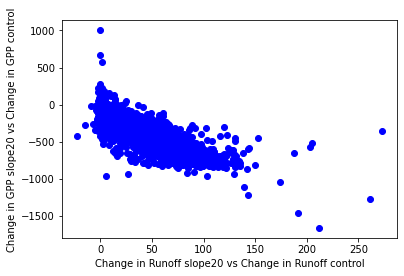

In [35]:
### Try for runoff out of curosity
#plt.figure(num=None, figsize=(15, 5),  facecolor='w', edgecolor='k')

ROControlStart = dsAnn.isel(case=0,time=slice(0,1)).mean('time')['QRUNOFF_TO_COUPLER']
ROControlEnd = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['QRUNOFF_TO_COUPLER']
ROSlope20Start = dsAnn.isel(case=1,time=slice(0,1)).mean('time')['QRUNOFF_TO_COUPLER']
ROSlope20End = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['QRUNOFF_TO_COUPLER']
DiffRO = (ROSlope20End-ROSlope20Start)-(ROControlEnd-ROControlStart)

#plt.subplot(1, 3, 1)
plt.scatter (DiffRO,DiffGPP, marker="o",color = 'b');
plt.ylabel('Change in GPP slope20 vs Change in GPP control')
plt.xlabel('Change in Runoff slope20 vs Change in Runoff control');
# plt.ylabel('CLM Latent Heat [W m-2]')
# plt.xlabel('CLM Canopy Evaporation [W m-2]')

In [36]:
### Calculate WUE change

## WUE in 2100, control case
ControlWUE = ann_Awgt_sub['WUE'].isel(case=0, time =250).values  

## WUE in 2100, slope 20 case 
Slope20WUE = ann_Awgt_sub['WUE'].isel(case=1, time =250).values  

## Calculate % difference/change
(Slope20WUE - ControlWUE)/ControlWUE

## ~14% reduced

-0.1438186421105041

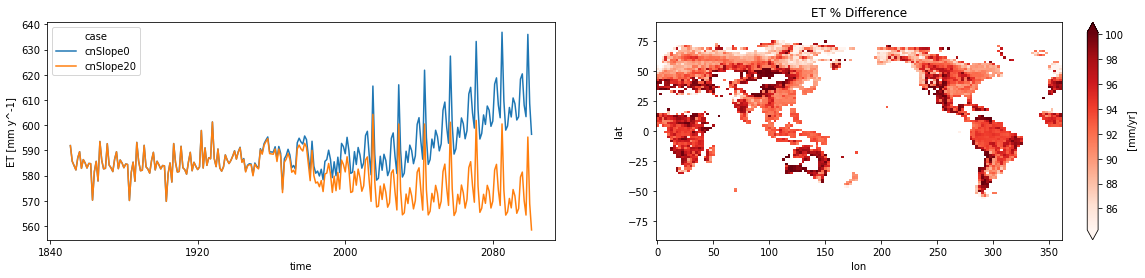

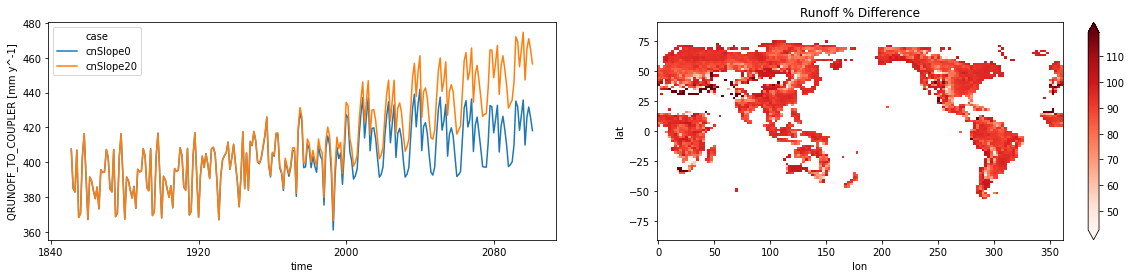

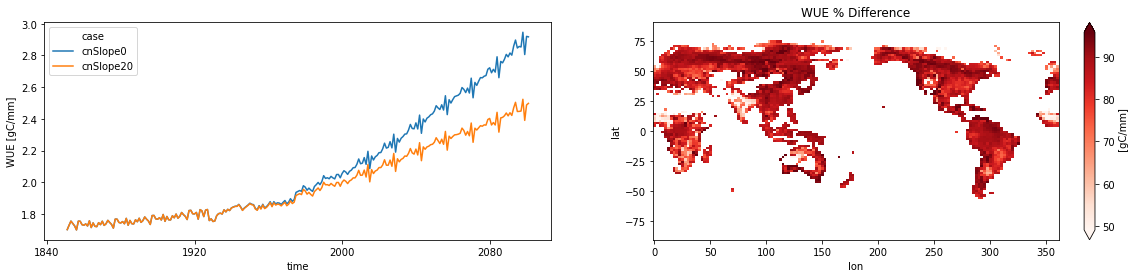

In [37]:
### Try some different difference plots
 # % difference, 100*Slope20/Control
 # Response ratio ln(slope20/control)

minGPP2 = 10
ann_Awgt_sub = ann_Awgt_sub.where(ann_Awgt_sub.GPP.min('time') > minGPP2)
minET = 10
ann_Awgt_sub = ann_Awgt_sub.where(ann_Awgt_sub.ET.min('time') > minET)

EcoVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WUE' ]
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(3):
    fig, ax = plt.subplots(1, 2, figsize=(20,4))
    ann_Awgt_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);

 ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    percentDiff = 100 * z20/z
    percentDiff = utils.cyclic_dataarray(percentDiff)
    lat = percentDiff.coords['lat']
    lon = percentDiff.coords['lon']
    
    percentDiff2 = 100 * z/z20
    percentDiff2 = utils.cyclic_dataarray(percentDiff2)
    lat = percentDiff.coords['lat']
    lon = percentDiff.coords['lon']
    ##Metadata needs added here for plots. 
    percentDiff.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'ET':
        percentDiff.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('ET % Difference')
    if EcoVars[i] == 'QRUNOFF_TO_COUPLER':
        percentDiff2.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('Runoff % Difference')
    if EcoVars[i] == 'WUE':
        percentDiff.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('WUE % Difference')


/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


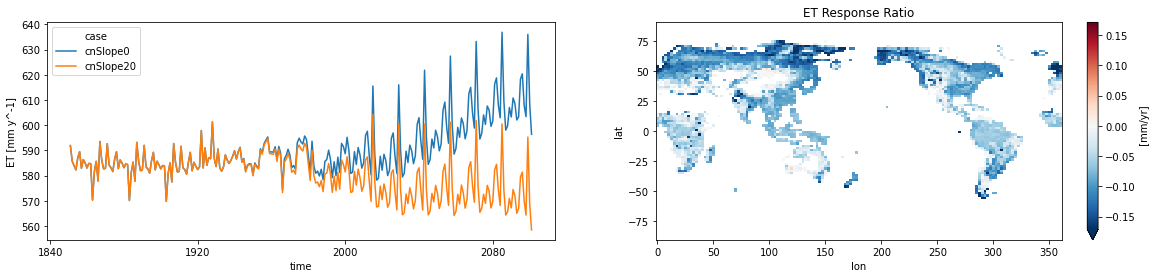

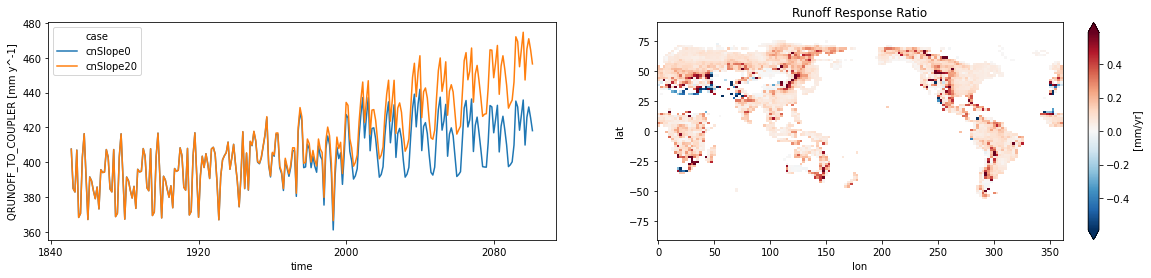

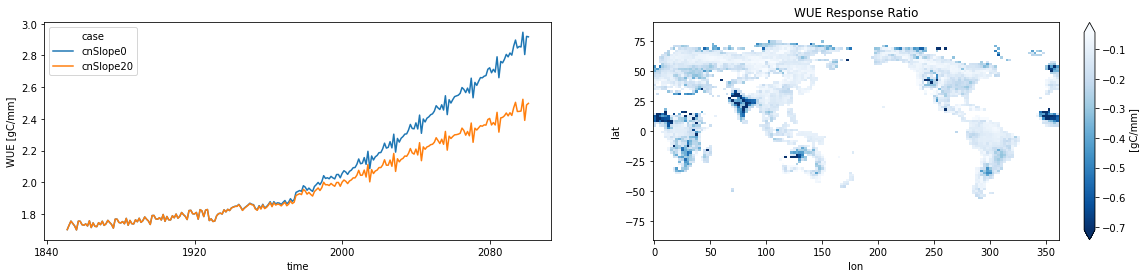

In [38]:
EcoVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WUE' ]
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(3):
    fig, ax = plt.subplots(1, 2, figsize=(20,4))
    ann_Awgt_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);

 ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    RR = np.log(z20/z)
    RR = utils.cyclic_dataarray(RR)
    lat = RR.coords['lat']
    lon = RR.coords['lon']
    ##Metadata needs added here for plots. 
    RR.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'ET':
        RR.plot(robust = True, ax = ax[1])
        plt.title('ET Response Ratio')
    if EcoVars[i] == 'QRUNOFF_TO_COUPLER':
        RR.plot(robust = True, ax = ax[1])
        plt.title('Runoff Response Ratio')
    if EcoVars[i] == 'WUE':
        RR.plot(robust = True, ax = ax[1], cmap = "Blues_r")
        plt.title('WUE Response Ratio')


In [39]:
##Calculate and plot water yield



In [40]:
##Try grouping by latitude and making a bar/scatter
year2100 = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')#['GPP']
year2100['lat'] = abs(year2100.lat)
lat5 = year2100.groupby_bins("lat", [0, 20, 60, 90]).mean('lat').mean('lon')

year2100b = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')#['GPP']
year2100b['lat'] = abs(year2100b.lat)
lat5b = year2100b.groupby_bins("lat", [0, 20, 60, 90]).mean('lat').mean('lon')

#lat5.aggregate(
#x1 = lat5.groupby('lat_bins').mean().reset_index()
#lat52100 = lat5.isel(case=0,time=slice(-1,None)).mean('time') #['GPP']
#plt.bar(lat5.GPP)


In [41]:
from collections import Counter
year2100_2 = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')
# n_bins=5
freqs = Counter(year2100_2['WUE'])
plt.bar(freqs.keys(), freqs.values())
plt.show()

TypeError: unhashable type: 'DataArray'

In [42]:
lowlatCon = year2100.isel(lat=slice(0,30))
lowlat20 = year2100b.isel(lat=slice(0,30))


midlatCon = year2100.isel(lat=slice(30,60))
midlat20 = year2100b.isel(lat=slice(30,60))

highlatCon = year2100.isel(lat=slice(60,90))
highlat20 = year2100b.isel(lat=slice(60,90))

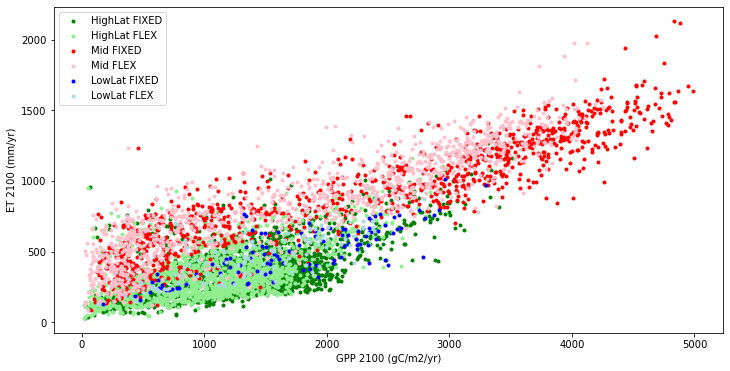

In [43]:

plt.figure(num=None, figsize=(12, 6),  facecolor='w', edgecolor='k')


plt.scatter(highlatCon.GPP, highlatCon.ET, marker=".",color = 'green', label = "HighLat FIXED")
plt.scatter(highlat20.GPP, highlat20.ET, marker=".",color = 'lightgreen', label = "HighLat FLEX")

plt.scatter(midlatCon.GPP, midlatCon.ET, marker=".",color = 'red', label = "Mid FIXED")
plt.scatter(midlat20.GPP, midlat20.ET, marker=".",color = 'pink', label = "Mid FLEX")

plt.scatter(lowlatCon.GPP, lowlatCon.ET, marker=".",color = 'b', label = "LowLat FIXED")
plt.scatter(lowlat20.GPP, lowlat20.ET, marker=".",color = 'lightblue', label = "LowLat FLEX");
plt.xlabel("GPP 2100 (gC/m2/yr)")
plt.ylabel("ET 2100 (mm/yr)")
plt.legend(); 

/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


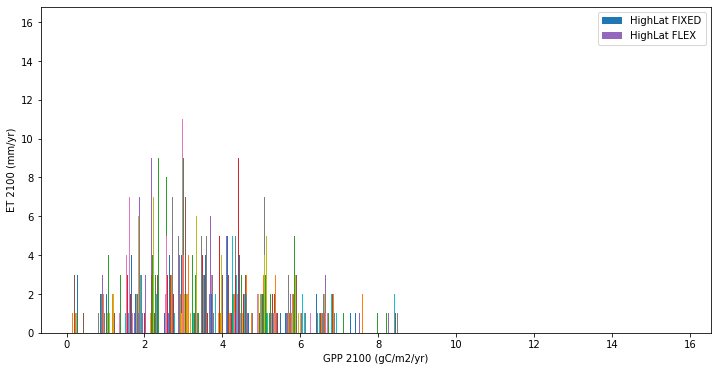

In [44]:

n_bins = 20

plt.figure(num=None, figsize=(12, 6),  facecolor='w', edgecolor='k')


plt.hist(highlatCon.WUE, bins = n_bins, label = "HighLat FIXED")
plt.hist(highlat20.WUE, bins = n_bins, label = "HighLat FLEX")

# plt.scatter(midlatCon.GPP, midlatCon.ET, marker=".",color = 'red', label = "Mid FIXED")
# plt.scatter(midlat20.GPP, midlat20.ET, marker=".",color = 'pink', label = "Mid FLEX")

# plt.scatter(lowlatCon.GPP, lowlatCon.ET, marker=".",color = 'b', label = "LowLat FIXED")
# plt.scatter(lowlat20.GPP, lowlat20.ET, marker=".",color = 'lightblue', label = "LowLat FLEX");
plt.xlabel("GPP 2100 (gC/m2/yr)")
plt.ylabel("ET 2100 (mm/yr)")
plt.legend();

In [45]:
lat5c = year2100.groupby_bins("lat", [0, 20, 60, 90]).mean('lat')
lat5d = year2100b.groupby_bins("lat", [0, 20, 60, 90]).mean('lat')
lowlatCon
                                            

<xarray.Dataset>
Dimensions:             (lat: 30, lon: 144)
Coordinates:
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 90.0 88.11 86.21 ... 38.84 36.95 35.05
    case                <U9 'cnSlope0'
Data variables: (12/32)
    NPP                 (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    GPP                 (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    LEAFCN              (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    QVEGT               (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    QVEGE               (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    QSOIL               (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    ...                  ...
    DiffGPPSlope20      (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    DiffETSlope20       (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    GPPControlEnd       (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    ETControlEnd        (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    GPPSlope20End       (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    ETSlope20End        (lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [46]:
ann_lat = dsAnn.mean(dim=('lon'))
futureCont = ann_lat.isel(case = [0], time=slice(-10,None)).mean('time').squeeze('case')
ETCm = futureCont['ET'].values/10
presentCont = ann_lat.isel(case = [0], time=slice(165,175)).mean('time').squeeze('case')
ETCm2 = presentCont['ET'].values/10

future20 = ann_lat.isel(case = [1], time=slice(-10,None)).mean('time').squeeze('case')
ETCm3 = future20['ET'].values/10
present20 = ann_lat.isel(case = [1], time=slice(165,175)).mean('time').squeeze('case')
ETCm4 = present20['ET'].values/10


In [47]:
dsAnn

<xarray.Dataset>
Dimensions:             (case: 3, time: 251, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/32)
    NPP                 (case, time, lat, lon) float64 nan nan nan ... nan nan
    GPP                 (case, time, lat, lon) float64 nan nan nan ... nan nan
    LEAFCN              (case, time, lat, lon) float64 nan nan nan ... nan nan
    QVEGT               (case, time, lat, lon) float64 nan nan nan ... nan nan
    QVEGE               (case, time, lat, lon) float64 nan nan nan ... nan nan
    QSOIL               (case, time, lat, lon) float64 nan nan nan ... nan nan
    ...                  ...
    DiffGPPSlope20      (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    DiffETSlope20       (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    GPPControlEnd       (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    ETControlEnd        (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    GPPSlope20End       (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    ETSlope20End        (lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes: (12/17)
    NPP:                 {'long_name': 'net primary production', 'units': 'gC...
    GPP:                 {'long_name': 'gross primary production', 'units': '...
    LEAFCN:              {'long_name': 'Leaf CN ratio used for flexible CN', ...
    QVEGT:               {'long_name': 'canopy transpiration', 'units': 'mm/s...
    QVEGE:               {'long_name': 'canopy evaporation', 'units': 'mm/s',...
    QSOIL:               {'long_name': 'Ground evaporation (soil/snow evapora...
    ...                  ...
    QRUNOFF_TO_COUPLER:  {'long_name': 'total liquid runoff sent to coupler (...
    ER:                  {'long_name': 'total ecosystem respiration, autotrop...
    HR:                  {'long_name': 'total heterotrophic respiration', 'un...
    NBP:                 {'long_name': 'net biome production, includes fire, ...
    NET_NMIN:            {'long_name': 'net rate of N mineralization', 'units...
    NFIX:                {'long_name': 'Symbiotic BNF uptake flux', 'units': ...

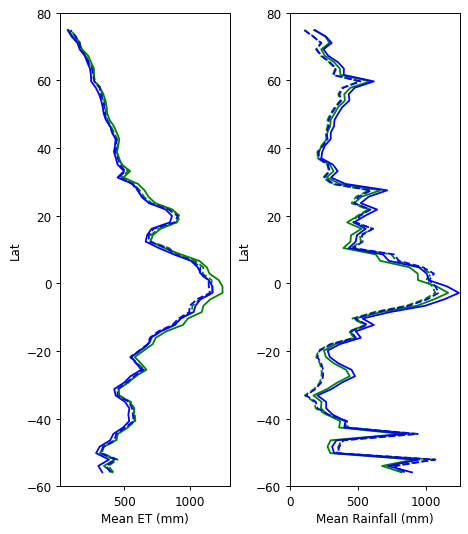

In [48]:
fig = plt.figure(figsize=(6, 9), dpi=86)
spec = fig.add_gridspec(16, 35)

ax1 = fig.add_subplot(spec[3:, :15])
ax1.plot(futureCont.get('ET'), futureCont.get('lat'), color = 'green');
ax1.plot(presentCont.get('ET'), presentCont.coords['lat'], color = 'green', linestyle = 'dashed');
ax1.plot(future20.get('ET'), future20.get('lat'), color = 'blue');
ax1.plot(present20.get('ET'), present20.coords['lat'], color = 'blue',linestyle = 'dashed' );
ax1.set_xlabel('Mean ET (mm)')
ax1.set_ylabel('Lat');
ax1.set_ylim(-60,80)
#ax1.set_title('Average Annual NBP');
#ax1.legend(loc='upper left');
    #plt.title(EcoVars[i]);
    
ax2 = fig.add_subplot(spec[3:, 20:35])
ax2.plot(futureCont.get('QRUNOFF_TO_COUPLER'), futureCont.get('lat'), color = 'green');
ax2.plot(presentCont.get('QRUNOFF_TO_COUPLER'), presentCont.coords['lat'], color = 'green', linestyle = 'dashed');
ax2.plot(future20.get('QRUNOFF_TO_COUPLER'), future20.get('lat'), color = 'blue');
ax2.plot(present20.get('QRUNOFF_TO_COUPLER'), present20.coords['lat'], color = 'blue',linestyle = 'dashed' );
ax2.set_xlabel('Mean Rainfall (mm)')
ax2.set_xlim(0,1250)
ax2.set_ylim(-60,80)
ax2.set_ylabel('Lat');

In [76]:
futureCont

NameError: name 'futureCont' is not defined

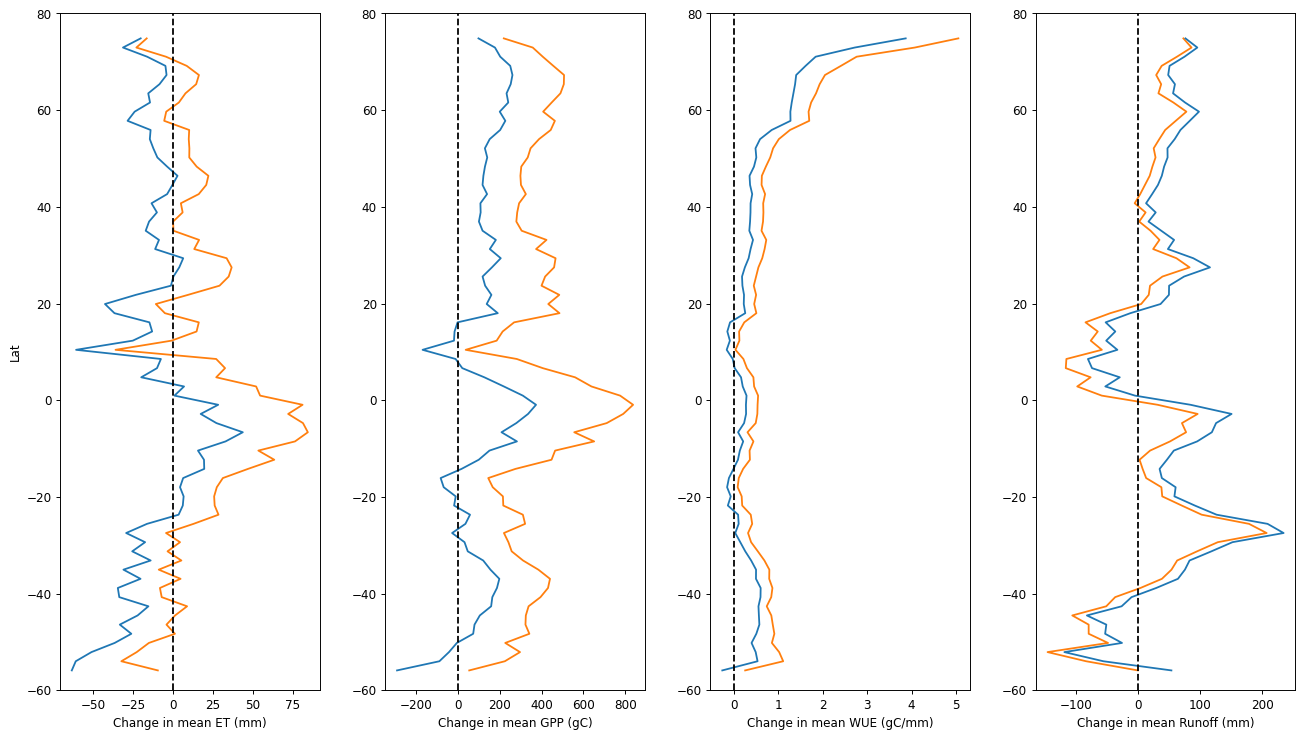

In [49]:
fig = plt.figure(figsize=(20, 15), dpi=86)
spec = fig.add_gridspec(10, 410)

ax1 = fig.add_subplot(spec[3:, :80])
ax1.plot(futureCont.get('ET')-presentCont.get('ET'), futureCont.get('lat'), color = '#ff7f0e');
ax1.plot(future20.get('ET')-present20.get('ET'), future20.get('lat'), color = '#1f77b4');

ax1.set_xlabel('Change in mean ET (mm)')
ax1.set_ylabel('Lat');
ax1.set_ylim(-60,80 )
ax1.axvline(0,color = 'black',linestyle = 'dashed')
#ax1.set_title('Average Annual NBP');
#ax1.legend(loc='upper left');
    #plt.title(EcoVars[i]);

ax2 = fig.add_subplot(spec[3:, 100:180])
ax2.plot(futureCont.get('GPP')-presentCont.get('GPP'), futureCont.get('lat'), color = '#ff7f0e');
ax2.plot(future20.get('GPP')-present20.get('GPP'), future20.get('lat'), color = '#1f77b4');

ax2.set_xlabel('Change in mean GPP (gC)')
ax2.set_ylabel('');
#ax2.set_yticklabels([])
ax2.set_ylim(-60,80 )
ax2.axvline(0,color = 'black',linestyle = 'dashed')

ax3 = fig.add_subplot(spec[3:, 200:280])
ax3.plot(futureCont.get('WUE')-presentCont.get('WUE'), futureCont.get('lat'), color = '#ff7f0e');
ax3.plot(future20.get('WUE')-present20.get('WUE'), future20.get('lat'), color = '#1f77b4');

ax3.set_xlabel('Change in mean WUE (gC/mm)')
ax3.set_ylabel('');
#ax3.set_yticklabels([])
ax3.set_ylim(-60,80 )
ax3.axvline(0,color = 'black',linestyle = 'dashed')
    
ax4 = fig.add_subplot(spec[3:, 300:380])
ax4.plot(futureCont.get('QRUNOFF_TO_COUPLER') - presentCont.get('QRUNOFF_TO_COUPLER'), futureCont.get('lat'), color = '#ff7f0e');
ax4.plot(future20.get('QRUNOFF_TO_COUPLER') -present20.get('QRUNOFF_TO_COUPLER'), future20.get('lat'), color = '#1f77b4');
ax4.set_xlabel('Change in mean Runoff (mm)')
#ax2.set_xlim(0,1250)
ax4.axvline(0,color = 'black',linestyle = 'dashed')
ax4.set_ylim(-60,80)
ax4.set_ylabel('');
#ax4.set_yticklabels([]);

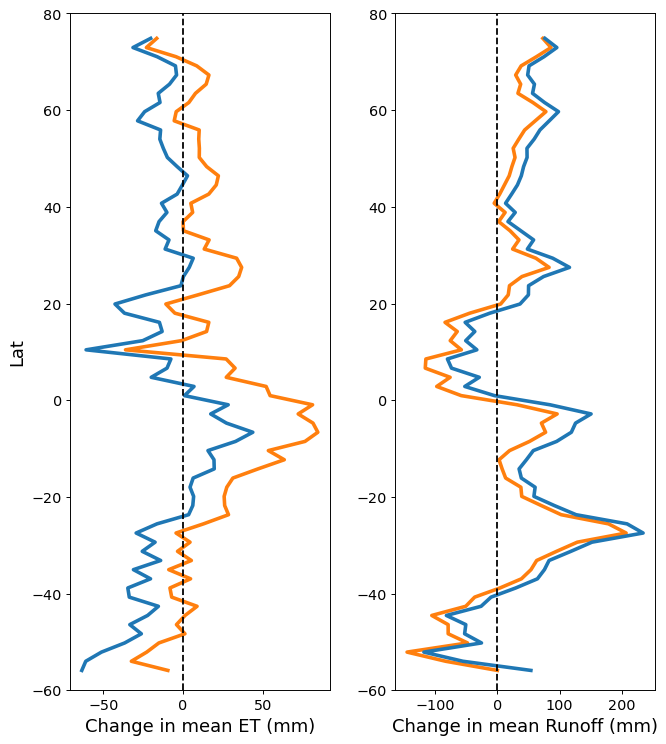

In [50]:
fig = plt.figure(figsize=(20, 15), dpi=86)
spec = fig.add_gridspec(10, 410)

ax1 = fig.add_subplot(spec[3:, :80])
ax1.plot(futureCont.get('ET')-presentCont.get('ET'), futureCont.get('lat'), color = '#ff7f0e', linewidth = 3);
ax1.plot(future20.get('ET')-present20.get('ET'), future20.get('lat'), color = '#1f77b4', linewidth = 3);
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel('Change in mean ET (mm)', size = 15)
ax1.set_ylabel('Lat', size = 15);
ax1.set_ylim(-60,80 )
ax1.axvline(0,color = 'black',linestyle = 'dashed')
#ax1.set_title('Average Annual NBP');
#ax1.legend(loc='upper left');
    #plt.title(EcoVars[i]);

# ax2 = fig.add_subplot(spec[3:, 100:180])
# ax2.plot(futureCont.get('GPP')-presentCont.get('GPP'), futureCont.get('lat'), color = '#ff7f0e');
# ax2.plot(future20.get('GPP')-present20.get('GPP'), future20.get('lat'), color = '#1f77b4');

# ax2.set_xlabel('Change in mean GPP (gC)')
# ax2.set_ylabel('');
# #ax2.set_yticklabels([])
# ax2.set_ylim(-60,80 )
# ax2.axvline(0,color = 'black',linestyle = 'dashed')

# ax3 = fig.add_subplot(spec[3:, 200:280])
# ax3.plot(futureCont.get('WUE')-presentCont.get('WUE'), futureCont.get('lat'), color = '#ff7f0e');
# ax3.plot(future20.get('WUE')-present20.get('WUE'), future20.get('lat'), color = '#1f77b4');

# ax3.set_xlabel('Change in mean WUE (gC/mm)')
# ax3.set_ylabel('');
# #ax3.set_yticklabels([])
# ax3.set_ylim(-60,80 )
# ax3.axvline(0,color = 'black',linestyle = 'dashed')
    
ax3 = fig.add_subplot(spec[3:, 100:180])
ax3.plot(futureCont.get('QRUNOFF_TO_COUPLER') - presentCont.get('QRUNOFF_TO_COUPLER'), futureCont.get('lat'), color = '#ff7f0e', linewidth = 3);
ax3.plot(future20.get('QRUNOFF_TO_COUPLER') -present20.get('QRUNOFF_TO_COUPLER'), future20.get('lat'), color = '#1f77b4', linewidth = 3);
ax3.set_xlabel('Change in mean Runoff (mm)', size = 15)
ax3.tick_params(axis='both', which='major', labelsize=12)
#ax2.set_xlim(0,1250)
ax3.axvline(0,color = 'black',linestyle = 'dashed')
ax3.set_ylim(-60,80)
ax3.set_ylabel('');
#ax4.set_yticklabels([]);

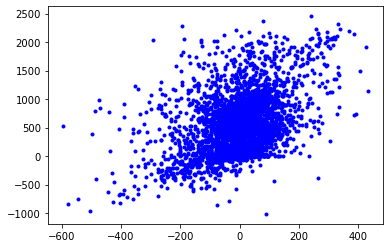

In [26]:
##Plot bars by region and/or by latitude

bins = ['low lat', 'mid lat', 'high lat']

plt.scatter(DiffETCont, DiffGPPCont, marker=".",color = 'b', label = "Control")
# plt.scatter(DiffETSlope20, DiffGPPSlope20, marker=".",color = 'orange', label = "Slope20");
# plt.bar(bins,lat5.ET);
# plt.bar(bins,lat5b.ET);




# plt.bar(bins,lat5.QRUNOFF_TO_COUPLER);
# plt.bar(bins,lat5b.QRUNOFF_TO_COUPLER);

<xarray.Dataset>
Dimensions:             (lat_bins: 5)
Coordinates:
  * lat_bins            (lat_bins) object (0, 18] (18, 36] ... (54, 72] (72, 90]
    case                <U9 'cnSlope0'
Data variables: (12/23)
    NPP                 (lat_bins) float64 972.2 579.6 602.2 461.8 129.2
    GPP                 (lat_bins) float64 2.275e+03 1.279e+03 ... 954.8 249.9
    LEAFCN              (lat_bins) float64 30.21 26.63 33.24 32.18 23.12
    QVEGT               (lat_bins) float64 355.4 213.7 189.5 105.3 22.69
    QVEGE               (lat_bins) float64 314.9 118.4 96.44 35.66 -1.033
    QSOIL               (lat_bins) float64 268.3 164.9 120.1 74.72 59.51
    ...                  ...
    RAIN                (lat_bins) float64 1.564e+03 751.2 698.0 494.7 164.7
    SNOW                (lat_bins) float64 0.0003295 5.408 66.92 194.2 174.5
    LITCN               (lat_bins) float64 46.13 41.56 46.3 47.99 35.56
    ET                  (lat_bins) float64 938.6 496.9 406.0 215.7 81.17
    WUE                 (lat_bins) float64 2.187 2.144 3.122 3.973 2.779
    WaterYield          (lat_bins) float64 0.06825 -inf 0.2578 0.6449 0.7728

In [91]:
#Tropical
tropics = dsFull.sel(lat=slice(-10,0),lon= slice((360-70),(360-50)))
landUp2 = landUp.sel(lat=slice(-10,0),lon= slice((360-70),(360-50)))
TropFuture = tropics.isel(time=slice(-120,None))

##Add ET Variable
TropFuture['ET'] = TropFuture.QVEGT + TropFuture.QVEGE + TropFuture.QSOIL
TropFuture['ET'].attrs['units'] = 'mm y^-1'
# minET = 10
# TropFuture = TropFuture.where(TropFuture.ET.min('time') > minET)
TropFuture = TropFuture/(3600 * 24*30)
TropFuture2 = (TropFuture * landUp2).sum(dim=('lat','lon'))
TropMonth = TropFuture2.groupby('time.month').mean()
TropMonth2 = TropMonth.isel(case=[0,1])
TropMonth2['ET'].attrs['units'] = 'mm/d'
TropMonth2['QRUNOFF_TO_COUPLER'].attrs['units'] = 'mm/d'
TropMonth2

<xarray.Dataset>
Dimensions:             (case: 2, month: 12)
Coordinates:
  * case                (case) <U9 'cnSlope0' 'cnSlope20'
  * month               (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/20)
    NPP                 (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    GPP                 (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    LEAFCN              (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    QVEGT               (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    QVEGE               (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    QSOIL               (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                  ...
    NBP                 (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    NET_NMIN            (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    NFIX                (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    RAIN                (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    SNOW                (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ET                  (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>

In [88]:
TropMonth2['ET'].values

array([[50.75942645, 47.83205533],
       [48.48995034, 45.80399028],
       [47.22220124, 44.52836803],
       [43.74644167, 41.19808732],
       [40.77008163, 38.24220473],
       [40.67495831, 37.94271308],
       [41.49302678, 38.67153408],
       [41.68599206, 38.93432359],
       [44.67125342, 41.9616446 ],
       [48.40567572, 45.55087727],
       [47.86914775, 44.84999697],
       [47.11554113, 44.13884076]])

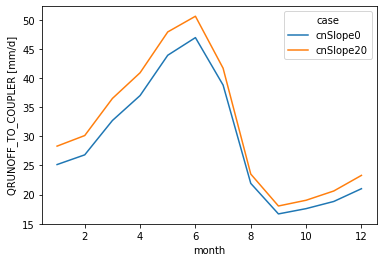

In [92]:
TropMonth2.get('QRUNOFF_TO_COUPLER').plot(hue='case');

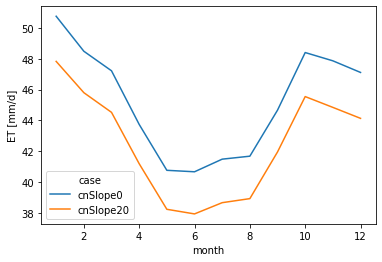

In [93]:
TropMonth2.get('ET').plot(hue='case');



In [103]:
#Temperate
temperate = dsFull.sel(lat=slice(30,50),lon= slice((360-90),(360-70)))
landUp3 = landUp.sel(lat=slice(30,50),lon= slice((360-90),(360-70)))
TempFuture = temperate.isel(time=slice(-120,None))

##Add ET Variable
TempFuture['ET'] = TempFuture.QVEGT + TempFuture.QVEGE + TempFuture.QSOIL
TempFuture['ET'].attrs['units'] = 'mm y^-1'
# minET = 10
# TropFuture = TropFuture.where(TropFuture.ET.min('time') > minET)
TempFuture = TempFuture/(3600 * 24*30) ### Need the 30 d? If so, how to adjust for each month? 
TempFuture2 = (TempFuture * landUp3).sum(dim=('lat','lon'))
TempMonth = TempFuture2.groupby('time.month').mean()
TempMonth2 = TempMonth.isel(case=[0,1])
TempMonth2['ET'].attrs['units'] = 'mm/d'
TempMonth2['QRUNOFF_TO_COUPLER'].attrs['units'] = 'mm/d'
TempMonth2

<xarray.Dataset>
Dimensions:             (case: 2, month: 12)
Coordinates:
  * case                (case) <U9 'cnSlope0' 'cnSlope20'
  * month               (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/20)
    NPP                 (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    GPP                 (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    LEAFCN              (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    QVEGT               (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    QVEGE               (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    QSOIL               (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                  ...
    NBP                 (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    NET_NMIN            (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    NFIX                (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    RAIN                (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    SNOW                (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ET                  (month, case) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>

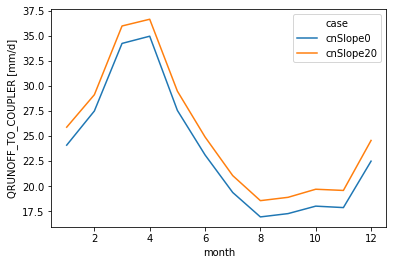

In [105]:

TempMonth2.get('QRUNOFF_TO_COUPLER').plot(hue='case');
#TropMonth2.get('ET').plot(hue='case');

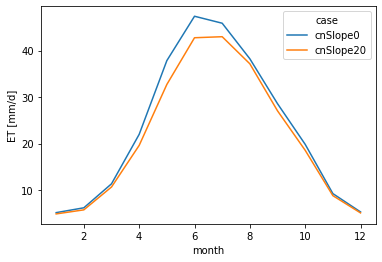

In [117]:
TempMonth2.get('ET').plot(hue='case');

In [118]:
#Boreal
boreal = dsFull.sel(lat=slice(50,66.5),lon= slice((90),(140)))
landUp4 = landUp.sel(lat=slice(50,66.5),lon= slice((90),(140)))
borealFuture = boreal.isel(time=slice(-120,None))

##Add ET Variable
borealFuture['ET'] = borealFuture.QVEGT + borealFuture.QVEGE + borealFuture.QSOIL
borealFuture['ET'].attrs['units'] = 'mm y^-1'
# minET = 10
# TropFuture = TropFuture.where(TropFuture.ET.min('time') > minET)
borealFuture = borealFuture/(3600 * 24*30) ### Need the 30 d? If so, how to adjust for each month? 
borealFuture2 = (borealFuture * landUp4).sum(dim=('lat','lon'))
borealMonth = borealFuture2.groupby('time.month').mean()
borealMonth2 = borealMonth.isel(case=[0,1])
borealMonth2['ET'].attrs['units'] = 'mm/d'
borealMonth2['QRUNOFF_TO_COUPLER'].attrs['units'] = 'mm/d'

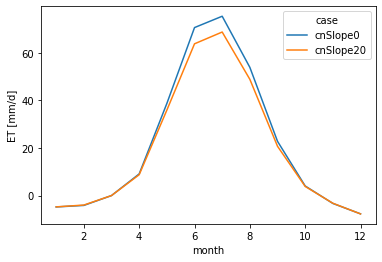

In [119]:
borealMonth2.get('ET').plot(hue='case');

## N specific plots (Fig 5)

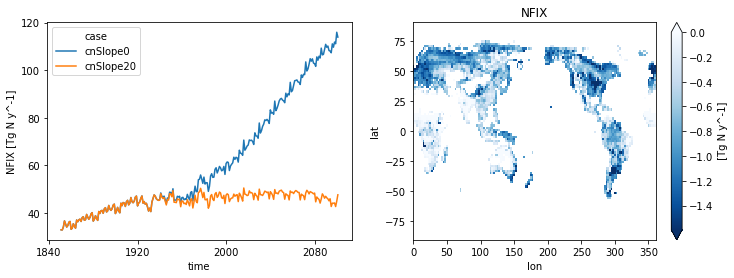

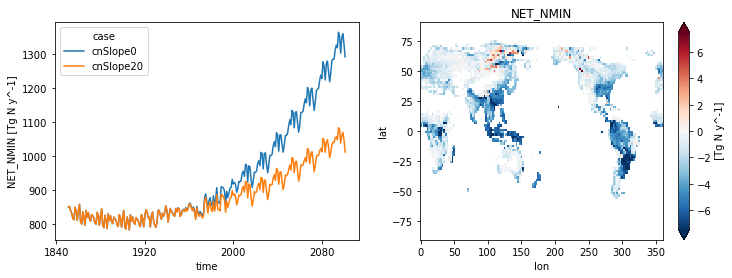

In [23]:
##Plot N vars

## Ecosystem feedback plots
# Include NPP, Nmin, Nfix, LITTERCN
EcoVars =  ['NFIX', 'NET_NMIN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(2):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ann_glob_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare last 10 y of slope 0 case and CN multi
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = ann_glob.get(EcoVars[i]).attrs
    if EcoVars[i] == 'NFIX':
        zdiff.plot(robust = True, ax = ax[1], cmap = 'Blues_r') ;
    if EcoVars[i] == 'NET_NMIN':
        zdiff.plot(robust = True, ax = ax[1])#, cmap = 'Blues_r') ;
    plt.title(EcoVars[i])

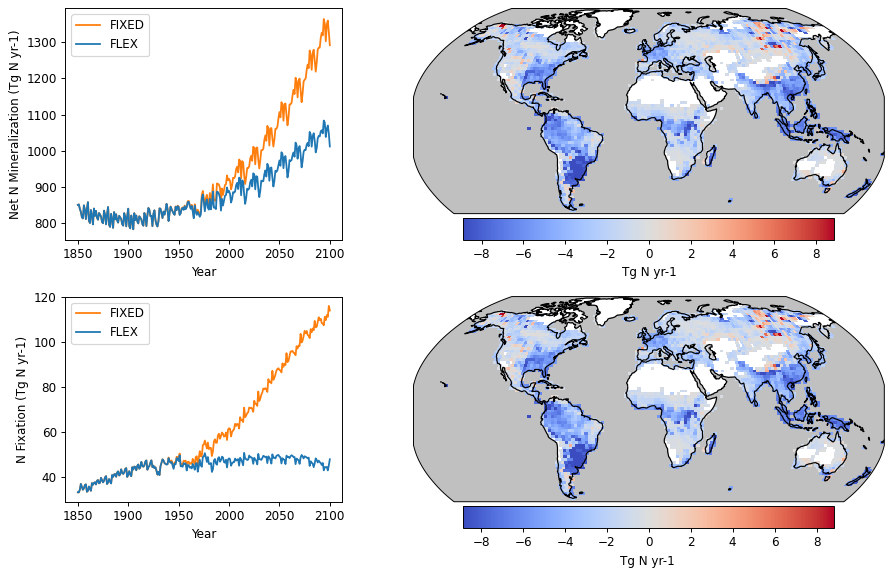

In [98]:
proj = ccrs.Robinson(central_longitude=0)
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['NET_NMIN']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['NET_NMIN']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']

fig = plt.figure(figsize=(14, 8), dpi=86)
spec = fig.add_gridspec(20, 40)

ax2 = fig.add_subplot(spec[0:8, 10:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Change in N Mineralization')
im = zdiff.plot(x='lon', y='lat',
                  #vmin=-7, vmax=7,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax = fig.add_subplot(spec[8:9, 17:33])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("Tg N yr-1", y=-2, fontsize = 10)
cax.xaxis.set_ticks_position('bottom')

ax1 = fig.add_subplot(spec[0:9, :12])
NPP1 = ann_glob_sub.isel(case = 1)
NPP1.attrs['NET_NMIN'] = ann_glob.get('NET_NMIN').attrs
NPP0 = ann_glob_sub.isel(case = 0)
NPP0.attrs['NET_NMIN'] = ann_glob.get('NET_NMIN').attrs

ax1.plot(ann_Awgt_sub.coords['time.year'], NPP0.get('NET_NMIN'), label = "FIXED", color = "#ff7f0e");
ax1.plot(ann_Awgt_sub.coords['time.year'], NPP1.get('NET_NMIN'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('Net N Mineralization (Tg N yr-1)')
ax1.set_title('');
ax1.legend(loc='upper left');

###############Start NFIX set 
z2 = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['NFIX']# Climatology for last 10 years of data
zMulti2 = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['NFIX']
zdiff2 = zMulti2 - z2
zdiff2 = utils.cyclic_dataarray(zdiff)

ax2 = fig.add_subplot(spec[11:19, 10:40], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Change in N Fixation')
im = zdiff2.plot(x='lon', y='lat',
                  #vmin=0, vmax=2000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)
cax3 = fig.add_subplot(spec[-1:,17:33])
cb3 = fig.colorbar(im, cax=cax3, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax3.set_title("Tg N yr-1 ", y=-2, fontsize = 10)
cax3.xaxis.set_ticks_position('bottom')

ax1 = fig.add_subplot(spec[11:19, :12])
NFIX1 = ann_glob_sub.isel(case = 1)
NFIX1.attrs['NFIX'] = ann_glob.get('NFIX').attrs
NFIX0 = ann_glob_sub.isel(case = 0)
NFIX0.attrs['NFIX'] = ann_glob.get('NFIX').attrs

ax1.plot(ann_glob_sub.coords['time.year'], NFIX0.get('NFIX'), label = "FIXED", color = "#ff7f0e");
ax1.plot(ann_glob_sub.coords['time.year'], NFIX1.get('NFIX'), label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('N Fixation (Tg N yr-1)')
ax1.set_title('');
ax1.legend(loc='upper left');

### Plots for supplemental data section and some other plotting experiments/ideas
 - Box plot for ranges of CN across different CO2 conditions from FACE experiments (eucFace, SPRUCE, others?)
 - Other scenarios/simulation runs more/less extreme (instead of slope 20)? Uncertainty analyses? 
 - LAI, FPI? 
 - Tables with rates (NPP, NBP, GPP, ER, HR, NFIX, NMIN etc. Maybe for start, now and 2100?) 

In [68]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

coolwarmBig = cm.get_cmap('coolwarm', 512)
newcmp = ListedColormap(coolwarmBig(np.linspace(0.25, 0.75, 256)))

test_cmap = build_custom_continuous_cmap([64,57,144],[112,198,162],[230,241,146],[253,219,127],[244,109,69],[169,23,69])


NameError: name 'build_custom_continuous_cmap' is not defined

#### LAI Plot

/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


ValueError: Only 1d and 2d plots are supported for facets in xarray. See the package `Seaborn` for more options.

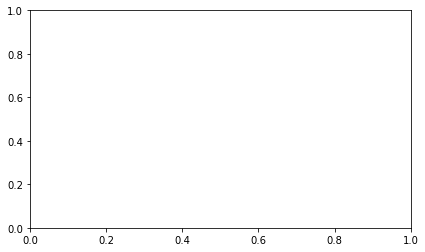

In [69]:
# Plot global LAI, summer difference last 10 years

# dsMax = ds.ELAI.where(ds.GPP.groupby('time.year')).idxmax('time')
# print(dsMax)

##Calculate seasonal means
leafYear_0 = dsFull.resample(time='QS-DEC').max().isel(time=slice(0,-1))
leaf_summer = leafYear_0.where(leafYear_0.time['time.month']==6, drop=True)

#area weighted mean
leaf_summer2 = (leaf_summer * area_wgt).sum(dim=('lat', 'lon'))
leaf_summer2 = leaf_summer2.isel(case = [0,1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
leaf_summer.ELAI.plot(hue = 'case');

plt.subplot(1,2,2)
y = leaf_summer.isel(case=0,time=slice(-10,None)).mean('time')['ELAI']# Climatology for last 10 years of data
y20 = leaf_summer.isel(case=1,time=slice(-10,None)).mean('time')['ELAI']
ydiff = y20 - y
ydiff = utils.cyclic_dataarray(ydiff)
lat = ydiff.coords['lat']
lon = ydiff.coords['lon']
ydiff.plot(robust = True) ;


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

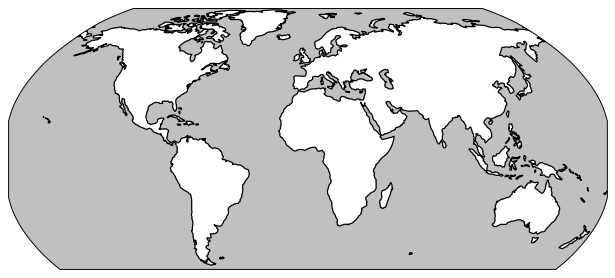

In [30]:
maxLAI = dsFull.ELAI.groupby('time.year').max()
ann_LAI = (maxLAI * area_wgt).sum(dim=('lat', 'lon'))

proj = ccrs.Robinson(central_longitude=0)
z = maxLAI.isel(case=0,year=slice(-10,None)).mean('year')
zdiff = maxLAI.isel(case=1,year=slice(-10,None)).mean('year')
z3 = zdiff - z# Climatology for last 10 years of data
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']


fig = plt.figure(figsize=(15, 5), dpi=86)
spec = fig.add_gridspec(16, 60)

ax2 = fig.add_subplot(spec[0:, 24:], projection=proj)
ax2.add_feature(cfeature.OCEAN, facecolor='silver')
ax2.coastlines()
ax2.set_extent((-180, 180, -58, 85), crs=ccrs.PlateCarree())
#ax2.set_title('Change in ELAI 2100')
im = z3.plot(x='lon', y='lat',
                  #vmin=-4000, vmax=4000,
                  cmap='coolwarm',
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False, robust = True)

#ax2.imshow(
#    zdiff, cmap="RdBu", vmin=-4000, vmax=4000,extent=[-180, 180,90,-90], transform=ccrs.PlateCarree())


cax = fig.add_subplot(spec[-1:,29:56])
cb1 = fig.colorbar(im, cax=cax, orientation="horizontal")#,shrink = 0.5, pad=0.02, fraction = 0.05)
cax.set_title("ELAI", y=-2.5, fontsize = 12)
cax.xaxis.set_ticks_position('bottom')

# grd = ax2.gridlines(
#     draw_labels=True, 
#     xlocs=range(-180, 181, 90), 
#     ylocs=range(-60, 61, 30), 
#     color='k',
# )
# grd.top_labels = False

#ax1.add_feature(cfeature.LAND, facecolor="#eeeeee", zorder=99)

ELAI1 = ann_LAI.isel(case = 1)
#ELAI1.attrs['ELAI'] = maxLAI.get('ELAI').attrs
ELAI0 = ann_LAI.isel(case = 0)
#ELAI0.attrs['ELAI'] = maxLAI.get('ELAI').attrs
ax1 = fig.add_subplot(spec[1:16, 5:23])
ax1.plot(ann_Awgt_sub.coords['time.year'], ELAI0.values, label = "FIXED", color = "#ff7f0e" );
ax1.plot(ann_Awgt_sub.coords['time.year'], ELAI1.values, label = "FLEX", color = "#1f77b4");
ax1.set_xlabel('Year')
ax1.set_ylabel('ELAI')
#ax1.set_title('Average Annual NBP');
ax1.legend(loc='upper left');



In [33]:
print(area_wgt)

<xarray.DataArray (lat: 96, lon: 144)>
dask.array<truediv, shape=(96, 144), dtype=float32, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0


In [52]:
## Plot Leaf C:N by max LAI

#I think this is what I'd rather do but also can calculate for summer only, which is similar. 
MaxLAI = dsFull.groupby('time.year').max()

# def time_mean(a):
#     return a.max(dim='time')

# test = MaxLAI.apply(time_mean)

# laiMax = dsFull.where(dsFull.ELAI == test.ELAI, drop = True)
# # dsFull2 = dsFull.to_dataframe()
# MaxLAI = dsFull2.sort_values('ELAI', ascending=False).drop_duplicates(['time.year'])
# df_maxLAI = dsFull.loc[dsFull.groupby('time.year')['ELAI'].idxmax(),'LEAFCN']

# # ##Calculate seasonal means
# leafYear_0 = dsFull.resample(time='QS-DEC').max().isel(time=slice(0,-1))
# leaf_summer = leafYear_0.where(leafYear_0.time['time.month']==6, drop=True)

# #area weighted mean
#LAI_summer2 = (laiMax * area_wgt).sum(dim=('lat', 'lon'))
#LAI_summer2 = LAI_summer2.isel(case = [0,1])

# plt.figure(figsize=(15,4))
# plt.subplot(1,2,1)
# leaf_summer2.LEAFCN.plot(hue = 'case');

# plt.subplot(1,2,2)
# y = leaf_summer.isel(case=0,time=slice(-10,None)).mean('time')['LEAFCN']# Climatology for last 10 years of data
# y20 = leaf_summer.isel(case=1,time=slice(-10,None)).mean('time')['LEAFCN']
# ydiff = y20 - y
# ydiff = utils.cyclic_dataarray(ydiff)
# lat = ydiff.coords['lat']
# lon = ydiff.coords['lon']
# ydiff.plot(robust = True) ;
MaxLAI


<xarray.Dataset>
Dimensions:             (year: 251, case: 3, lat: 96, lon: 144)
Coordinates:
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
  * year                (year) int64 1850 1851 1852 1853 ... 2097 2098 2099 2100
Data variables: (12/19)
    NPP                 (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    GPP                 (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    LEAFCN              (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    QVEGT               (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    QVEGE               (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    QSOIL               (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    NBP                 (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    NET_NMIN            (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    NFIX                (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    RAIN                (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>
    SNOW                (year, case, lat, lon) float32 dask.array<chunksize=(1, 1, 96, 144), meta=np.ndarray>

maxLAI

In [57]:

# def my_func(dsFull, dim=None):
#     return dsFull.isel(**{dim: dsFull['ELAI'].argmax(dim)})


# new = dsFull.groupby('time.year').apply(my_func, dim='time')
# new

#new = dsFull.groupby('time.year').argmax('time')

maxLAI = dsFull.ELAI.resample(time="12M").max()

LAIMax = dsFull.where(dsFull.ELAI == maxLAI)

    #dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP2)
maxLAI

<xarray.DataArray 'ELAI' (case: 3, time: 252, lat: 96, lon: 144)>
dask.array<transpose, shape=(3, 252, 96, 144), dtype=float32, chunksize=(1, 1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-31 00:00:00 ... 2101-01-31 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * case     (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'

In [54]:
maxLAI.repeat(12)

AttributeError: 'DataArray' object has no attribute 'repeat'

In [34]:
test = dsFull.where(dsFull.ELAI.groupby('time.year') == maxLAI)

In [33]:
maxLAI = dsFull.ELAI.groupby('time.year').max()
maxLAI

<xarray.DataArray 'ELAI' (case: 3, year: 251, lat: 96, lon: 144)>
dask.array<transpose, shape=(3, 251, 96, 144), dtype=float32, chunksize=(1, 1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * case     (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100

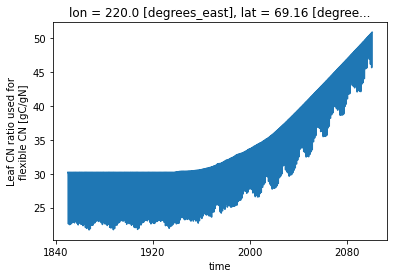

In [65]:
#test.LEAFCN.sel(lat = 0, lon = 25, method = 'nearest').isel(case = 1, time = slice(0,50)).plot()
dsFull.LEAFCN.sel(lat = 68.7, lon = 220, method = 'nearest').isel(case = 1).plot()

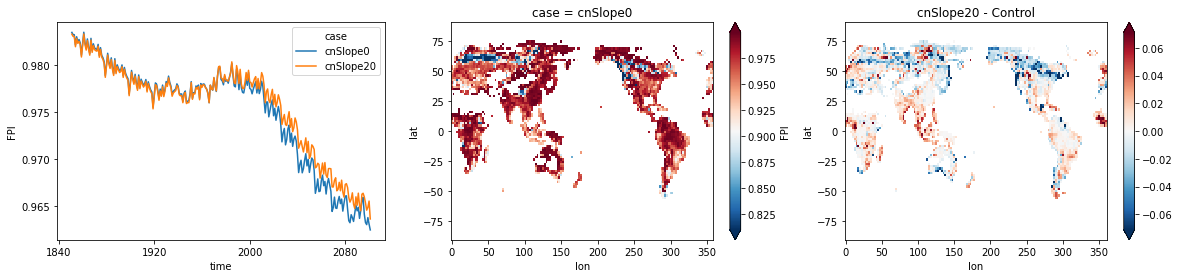

In [19]:
### Try plot of FPI


EcoVars = ['FPI'] #'ER'
minVal = 0

for i in range(1):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_Awgt_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    z.attrs = dsAnn.get(EcoVars[i]).attrs
    zdiff.attrs[EcoVars[i]] = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'FPI':
        z.plot(robust = True, ax = ax[1], cmap = "RdBu_r")
        plt.title('FPI Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('cnSlope20 - Control')

In [ ]:
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

custom_map = custom_div_cmap(13, maxcol='blue', midcol='0.9' ,mincol='saddleBrown')